In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from tqdm import tqdm

Reading dataset

In [3]:
df1 = pd.read_csv('Blood_samples_dataset_balanced_2(f).csv')
df1

ID   Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0     B00001  0.739597     0.650198    0.713631   0.868491           0.687433   
1     B00002  0.121786     0.023058    0.944893   0.905372           0.507711   
2     B00003  0.452539     0.116135    0.544560   0.400640           0.294538   
3     B00004  0.136609     0.015605    0.419957   0.191487           0.081168   
4     B00005  0.176737     0.752220    0.971779   0.785286           0.443880   
...      ...       ...          ...         ...        ...                ...   
2346  B02347  0.012956     0.336925    0.451218   0.175006           0.734664   
2347  B02348  0.407101     0.124738    0.983306   0.663867           0.361113   
2348  B02349  0.344356     0.783918    0.582171   0.996841           0.065363   
2349  B02350  0.351722     0.014278    0.898615   0.167550           0.727148   
2350  B02351  0.032726     0.053596    0.102633   0.221356           0.153956   

      Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0            0.529895    0.290006                 0.631045   
1            0.403033    0.164216                 0.307553   
2            0.382021    0.625267                 0.295122   
3            0.166214    0.073293                 0.668719   
4            0.439851    0.894991                 0.442159   
...               ...         ...                      ...   
2346         0.382770    0.656463                 0.177502   
2347         0.663716    0.232516                 0.341056   
2348         0.242885    0.658851                 0.543017   
2349         0.046091    0.900434                 0.136227   
2350         0.216573    0.312577                 0.608940   

      Mean Corpuscular Hemoglobin  ...     HbA1c  LDL Cholesterol  \
0                        0.001328  ...  0.502665         0.215560   
1                        0.207938  ...  0.856810         0.652465   
2                        0.868369  ...  0.466795         0.387332   
3                        0.125447  ...  0.016256         0.040137   
4                        0.257288  ...  0.429431         0.146294   
...                           ...  ...       ...              ...   
2346                     0.808162  ...  0.670665         0.311568   
2347                     0.847441  ...  0.491185         0.701914   
2348                     0.290106  ...  0.141738         0.155871   
2349                     0.134361  ...  0.570553         0.171245   
2350                     0.486174  ...  0.188750         0.331887   

      HDL Cholesterol       ALT       AST  Heart Rate  Creatinine  Troponin  \
0            0.512941  0.064187  0.610827    0.939485    0.095512  0.465957   
1            0.106961  0.942549  0.344261    0.666368    0.659060  0.816982   
2            0.421763  0.007186  0.506918    0.431704    0.417295  0.799074   
3            0.826721  0.265415  0.594148    0.225756    0.490349  0.637061   
4            0.221574  0.015280  0.567115    0.841412    0.153350  0.794008   
...               ...       ...       ...         ...         ...       ...   
2346         0.595083  0.155866  0.885812    0.636125    0.132226  0.716519   
2347         0.218104  0.790341  0.570902    0.339125    0.310964  0.310900   
2348         0.473638  0.250535  0.387197    0.344728    0.606719  0.395145   
2349         0.858352  0.362012  0.290984    0.996873    0.882164  0.411158   
2350         0.562622  0.680462  0.099538    0.982893    0.437285  0.288961   

      C-reactive Protein   Disease  
0               0.769230   Healthy  
1               0.401166  Diabetes  
2               0.779208  Thalasse  
3               0.354094    Anemia  
4               0.094970  Thalasse  
...                  ...       ...  
2346            0.006121  Diabetes  
2347            0.622403  Thalasse  
2348            0.134021    Anemia  
2349            0.146255  Diabetes  
2350            0.709262    Anemia  

[2351 rows x 26 columns]

In [4]:
df2 = pd.read_csv('blood_samples_dataset_test.csv')
df2

ID   Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0    A00001  0.001827     0.033693    0.114755   0.997927           0.562604   
1    A00002  0.436679     0.972653    0.084998   0.180909           0.675736   
2    A00003  0.545697     0.324815    0.584467   0.475748           0.558596   
3    A00004  0.172994     0.050351    0.736000   0.782022           0.069435   
4    A00005  0.758534     0.739968    0.597868   0.772683           0.875720   
..      ...       ...          ...         ...        ...                ...   
481  A00482  0.985163     0.412960    0.529993   0.263765           0.431288   
482  A00483  0.581914     0.629325    0.491644   0.901473           0.347797   
483  A00484  0.066669     0.404558    0.591041   0.228401           0.127461   
484  A00485  0.901444     0.430680    0.243853   0.825551           0.493884   
485  A00486  0.877912     0.597809    0.730440   0.462307           0.498438   

     Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0           0.866499    0.578042                 0.914615   
1           0.563889    0.798382                 0.670361   
2           0.661007    0.934056                 0.381782   
3           0.085219    0.032907                 0.460619   
4           0.860265    0.486189                 0.486686   
..               ...         ...                      ...   
481         0.198882    0.581289                 0.701192   
482         0.633286    0.698114                 0.516947   
483         0.026670    0.847444                 0.279740   
484         0.726299    0.660930                 0.445560   
485         0.792822    0.976056                 0.883937   

     Mean Corpuscular Hemoglobin  ...     HbA1c  LDL Cholesterol  \
0                       0.026864  ...  0.653230         0.186104   
1                       0.376092  ...  0.833540         0.153001   
2                       0.500342  ...  0.678901         0.220479   
3                       0.785448  ...  0.381500         0.459396   
4                       0.621048  ...  0.993381         0.272338   
..                           ...  ...       ...              ...   
481                     0.249410  ...  0.680556         0.048191   
482                     0.674259  ...  0.261767         0.482322   
483                     0.575425  ...  0.168146         0.763625   
484                     0.349782  ...  0.893448         0.500059   
485                     0.202147  ...  0.242163         0.783372   

     HDL Cholesterol       ALT       AST  Heart Rate  Creatinine  Troponin  \
0           0.430398  0.016678  0.885352    0.652733    0.788235  0.054788   
1           0.458533  0.401845  0.635969    0.574425    0.047025  0.607985   
2           0.817151  0.690981  0.101633    0.855740    0.551124  0.413294   
3           0.420154  0.798537  0.399236    0.324600    0.499504  0.436662   
4           0.663579  0.265227  0.918847    0.804910    0.571119  0.188368   
..               ...       ...       ...         ...         ...       ...   
481         0.465272  0.066511  0.965544    0.015051    0.442730  0.196986   
482         0.799523  0.807460  0.325313    0.825194    0.777866  0.415987   
483         0.677782  0.890501  0.638825    0.559993    0.795478  0.669925   
484         0.112250  0.548469  0.211496    0.938355    0.463381  0.862921   
485         0.568568  0.784730  0.500928    0.016738    0.104687  0.055181   

     C-reactive Protein   Disease  
0              0.031313  Thalasse  
1              0.594123  Diabetes  
2              0.070909  Heart Di  
3              0.242766  Diabetes  
4              0.750848  Heart Di  
..                  ...       ...  
481            0.816038  Diabetes  
482            0.842804  Heart Di  
483            0.124874    Anemia  
484            0.658526  Diabetes  
485            0.049341  Diabetes  

[486 rows x 26 columns]

In [5]:
df = pd.concat([df1,df2])

In [6]:
"""
    "Glucose": (70, 140),  # mg/dL
    "Cholesterol": (125, 200),  # mg/dL
    "Hemoglobin": (13.5, 17.5),  # g/dL
    "Platelets": (150000, 450000),  # per microliter of blood
    "White Blood Cells": (4000, 11000),  # per cubic millimeter of blood
    "Red Blood Cells": (4.2, 5.4),  # million cells per microliter of blood
    "Hematocrit": (38, 52),  # percentage
    "Mean Corpuscular Volume": (80, 100),  # femtoliters
    "Mean Corpuscular Hemoglobin": (27, 33),  # picograms
    "Mean Corpuscular Hemoglobin Concentration": (32, 36),  # grams per deciliter
    "Insulin": (5, 25),  # microU/mL
    "BMI": (18.5, 24.9),  # kg/m^2
    "Systolic Blood Pressure": (90, 120),  # mmHg
    "Diastolic Blood Pressure": (60, 80),  # mmHg
    "Triglycerides": (50, 150),  # mg/dL
    "HbA1c": (4, 6),  # percentage
    "LDL Cholesterol": (70, 130),  # mg/dL
    "HDL Cholesterol": (40, 60),  # mg/dL
    "ALT": (10, 40),  # U/L
    "AST": (10, 40),  # U/L
    "Heart Rate": (60, 100),  # beats per minute
    "Creatinine": (0.6, 1.2),  # mg/dL
    "Troponin": (0, 0.04),  # ng/mL
    "C-reactive Protein": (0, 3),  # mg/L
"""

'\n    "Glucose": (70, 140),  # mg/dL\n    "Cholesterol": (125, 200),  # mg/dL\n    "Hemoglobin": (13.5, 17.5),  # g/dL\n    "Platelets": (150000, 450000),  # per microliter of blood\n    "White Blood Cells": (4000, 11000),  # per cubic millimeter of blood\n    "Red Blood Cells": (4.2, 5.4),  # million cells per microliter of blood\n    "Hematocrit": (38, 52),  # percentage\n    "Mean Corpuscular Volume": (80, 100),  # femtoliters\n    "Mean Corpuscular Hemoglobin": (27, 33),  # picograms\n    "Mean Corpuscular Hemoglobin Concentration": (32, 36),  # grams per deciliter\n    "Insulin": (5, 25),  # microU/mL\n    "BMI": (18.5, 24.9),  # kg/m^2\n    "Systolic Blood Pressure": (90, 120),  # mmHg\n    "Diastolic Blood Pressure": (60, 80),  # mmHg\n    "Triglycerides": (50, 150),  # mg/dL\n    "HbA1c": (4, 6),  # percentage\n    "LDL Cholesterol": (70, 130),  # mg/dL\n    "HDL Cholesterol": (40, 60),  # mg/dL\n    "ALT": (10, 40),  # U/L\n    "AST": (10, 40),  # U/L\n    "Heart Rate": (60, 

Check dataset info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2837 entries, 0 to 485
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         2837 non-null   object 
 1   Glucose                                    2837 non-null   float64
 2   Cholesterol                                2837 non-null   float64
 3   Hemoglobin                                 2837 non-null   float64
 4   Platelets                                  2837 non-null   float64
 5   White Blood Cells                          2837 non-null   float64
 6   Red Blood Cells                            2837 non-null   float64
 7   Hematocrit                                 2837 non-null   float64
 8   Mean Corpuscular Volume                    2837 non-null   float64
 9   Mean Corpuscular Hemoglobin                2837 non-null   float64
 10  Mean Corpuscular Hemoglobin Co

In [8]:
df.isnull().any()

ID                                           False
Glucose                                      False
Cholesterol                                  False
Hemoglobin                                   False
Platelets                                    False
White Blood Cells                            False
Red Blood Cells                              False
Hematocrit                                   False
Mean Corpuscular Volume                      False
Mean Corpuscular Hemoglobin                  False
Mean Corpuscular Hemoglobin Concentration    False
Insulin                                      False
BMI                                          False
Systolic Blood Pressure                      False
Diastolic Blood Pressure                     False
Triglycerides                                False
HbA1c                                        False
LDL Cholesterol                              False
HDL Cholesterol                              False
ALT                            

In [9]:
df['Disease'].value_counts()

Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64

Preprocessing and visualize data

In [10]:
df.duplicated().sum()

0

In [11]:
df = df.drop(columns='ID')

In [12]:
cols = df.columns.to_list()
cols.pop()

'Disease'

First, visualize the labels and the number of instances for each label.

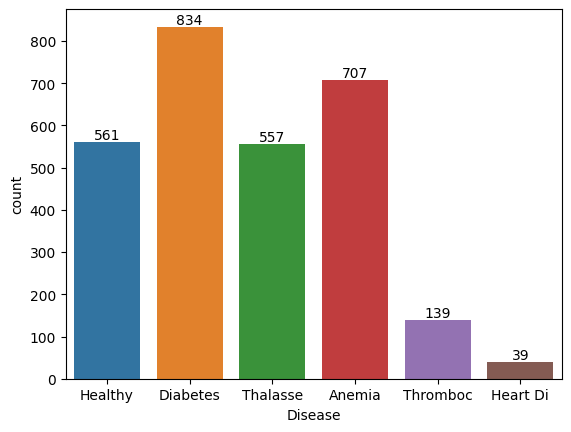

In [13]:
label_plot = sb.countplot(x = df['Disease'])
label_plot.bar_label(label_plot.containers[0])
plt.show()

In [14]:
label_names = df['Disease'].unique().tolist()
label_names

['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc', 'Heart Di']

There are six labels in this dataset, and they seem to be imbalanced

After visualizing the labels, I proceeded to visualize the features to gain insights into this dataset.

1.  Glucose (mg/dL)

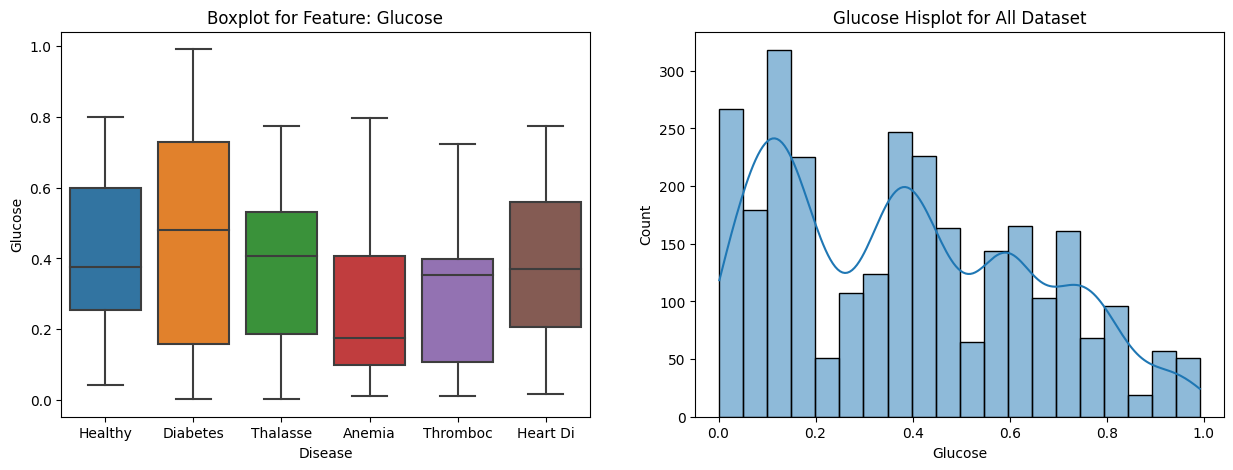

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Glucose'], data=df)
plt.title(f'Boxplot for Feature: Glucose')
plt.subplot(1,2,2)
sb.histplot(data=df, x=df['Glucose'], bins=20, kde=True)
plt.title(f'Glucose Hisplot for All Dataset')
plt.show()

I observed that instances labeled as 'Healthy' typically exhibit Glucose levels ranging from 0.25 to 0.6 mg/dL, with an average of approximately 0.4 mg/dL in this dataset. Similar trends are observed for other labels: 'Diabetes' ranges from 0.35 to 0.75 with an average of 0.5, 'Thalasse' from 0.2 to 0.55 with an average of 0.4, 'Anemia' from 0.1 to 0.4 with an average of 0.2, 'Thromboc' from 0.1 to 0.4 with an average of 0.35, and 'Heart Di' from 0.2 to 0.6 with an average of 0.4.

From the histogram plot of Glucose for the entire dataset, I observe a gradual decrease in the number of instances, with the highest concentration occurring between 0.0 and 0.2. Consequently, the Glucose parameter is likely to have a significant impact on the instance distribution for labels such as 'Diabetes', 'Thalasse', 'Anemia', and 'Thromboc'. Particularly noteworthy is the influence on 'Anemia', especially considering that the average number of instances falls slightly below 0.2.

Below are plots showing a more detailed distribution of the number of instances for each Disease.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

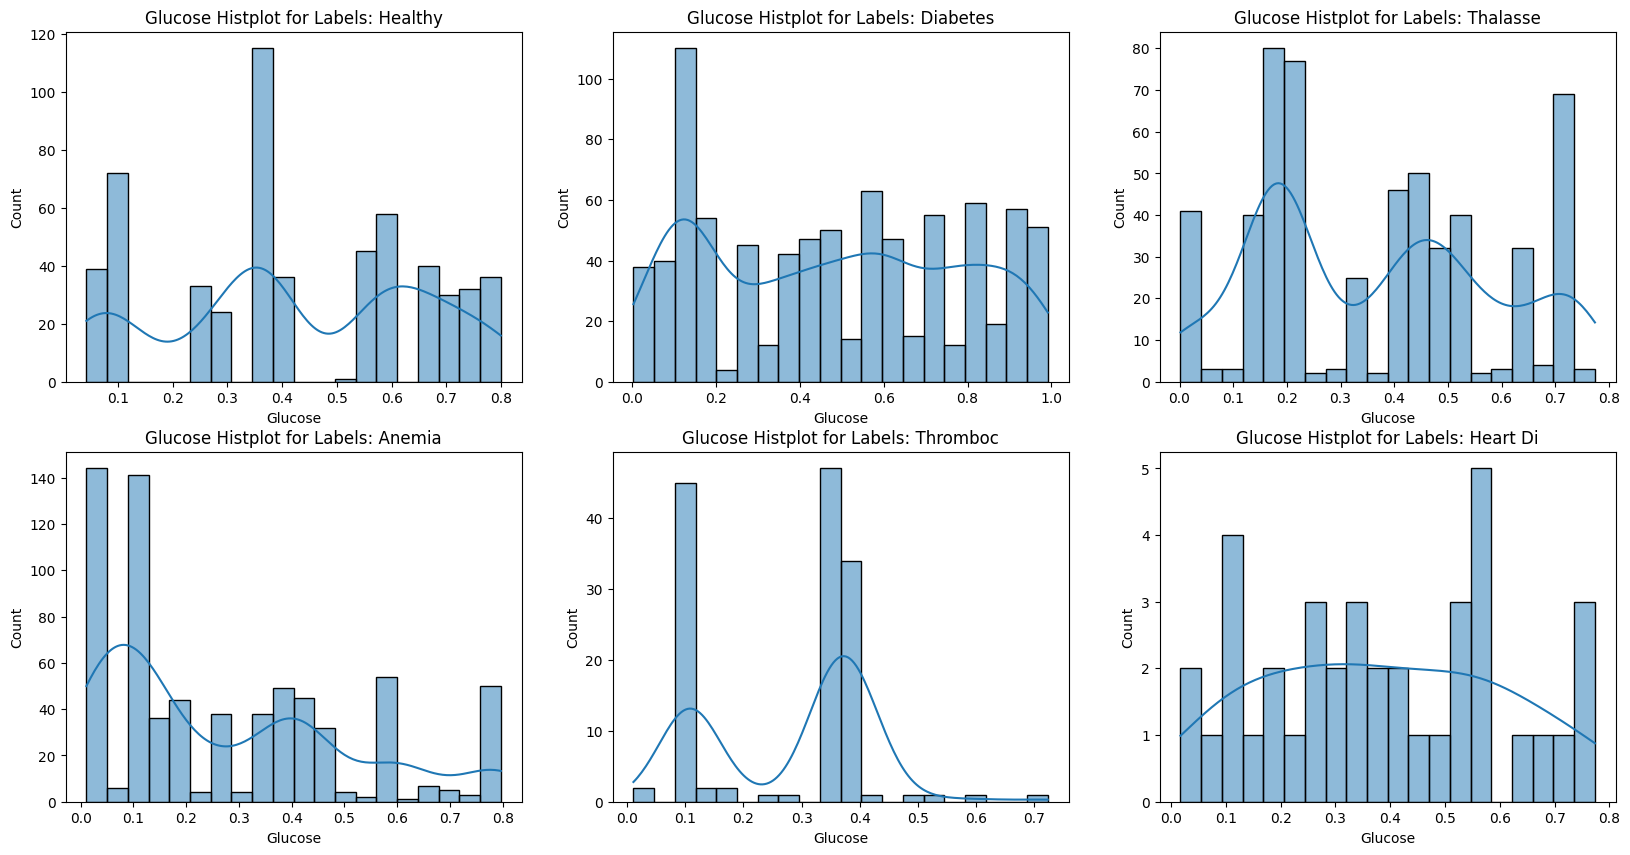

In [16]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Glucose', bins=20, kde=True)
    plt.title(f'Glucose Histplot for Labels: {label_names[i]}')
plt.tight_layout

2. Cholesterol (mg/dL)

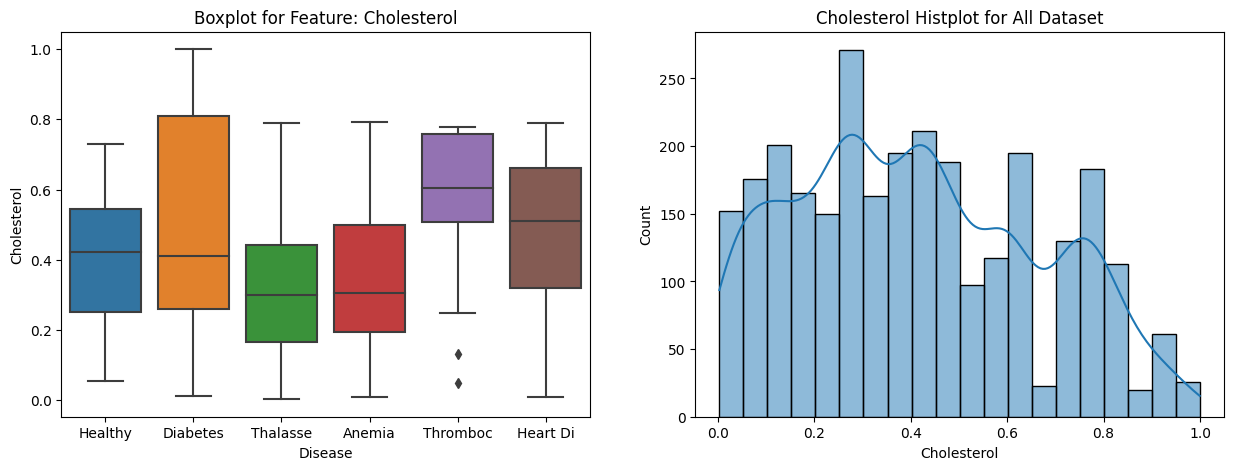

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Cholesterol'], data=df)
plt.title(f'Boxplot for Feature: Cholesterol')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Cholesterol'],bins=20,kde=True)
plt.title(f'Cholesterol Histplot for All Dataset')
plt.show()

"Similar to the Glucose boxplot, the Cholesterol boxplot indicates that for 'Healthy' instances, the distribution of Cholesterol mostly falls within the range of 0.25 to 0.55, with an average exceeding 0.4. For 'Diabetes', the range is from 0.25 to 0.8, with an average of 0.4. 'Thalasse' instances show Cholesterol levels between 0.18 to 0.41, with an average around 0.3. 'Anemia' instances exhibit Cholesterol levels ranging from 0.2 to 0.5, with an average of 0.3. 'Thromboc' instances typically have Cholesterol levels ranging from 0.55 to 0.75, with an average around 0.6, although two special cases are noted at approximately 0.05 and 0.15. Finally, for 'Heart Di' instances, Cholesterol levels range from 0.3 to 0.65, with an average of about 0.5."

Based on the Cholesterol histplot for the entire dataset, I observe that the majority of instances are distributed between 0.0 and 0.4, with a notable concentration from 0.2 to 0.4. Most diseases exhibit their Cholesterol distribution within this range, especially 'Thalasse' and 'Anemia', which have average values inside that range. However, for the 'Thromboc' and 'Heart Di' labels, their distributions are slightly outside this range. This suggests that Cholesterol is a feature likely to have a strong effect on the instance distribution of all the labels in this dataset.

Below is the detailed instance distribution of each Labels

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

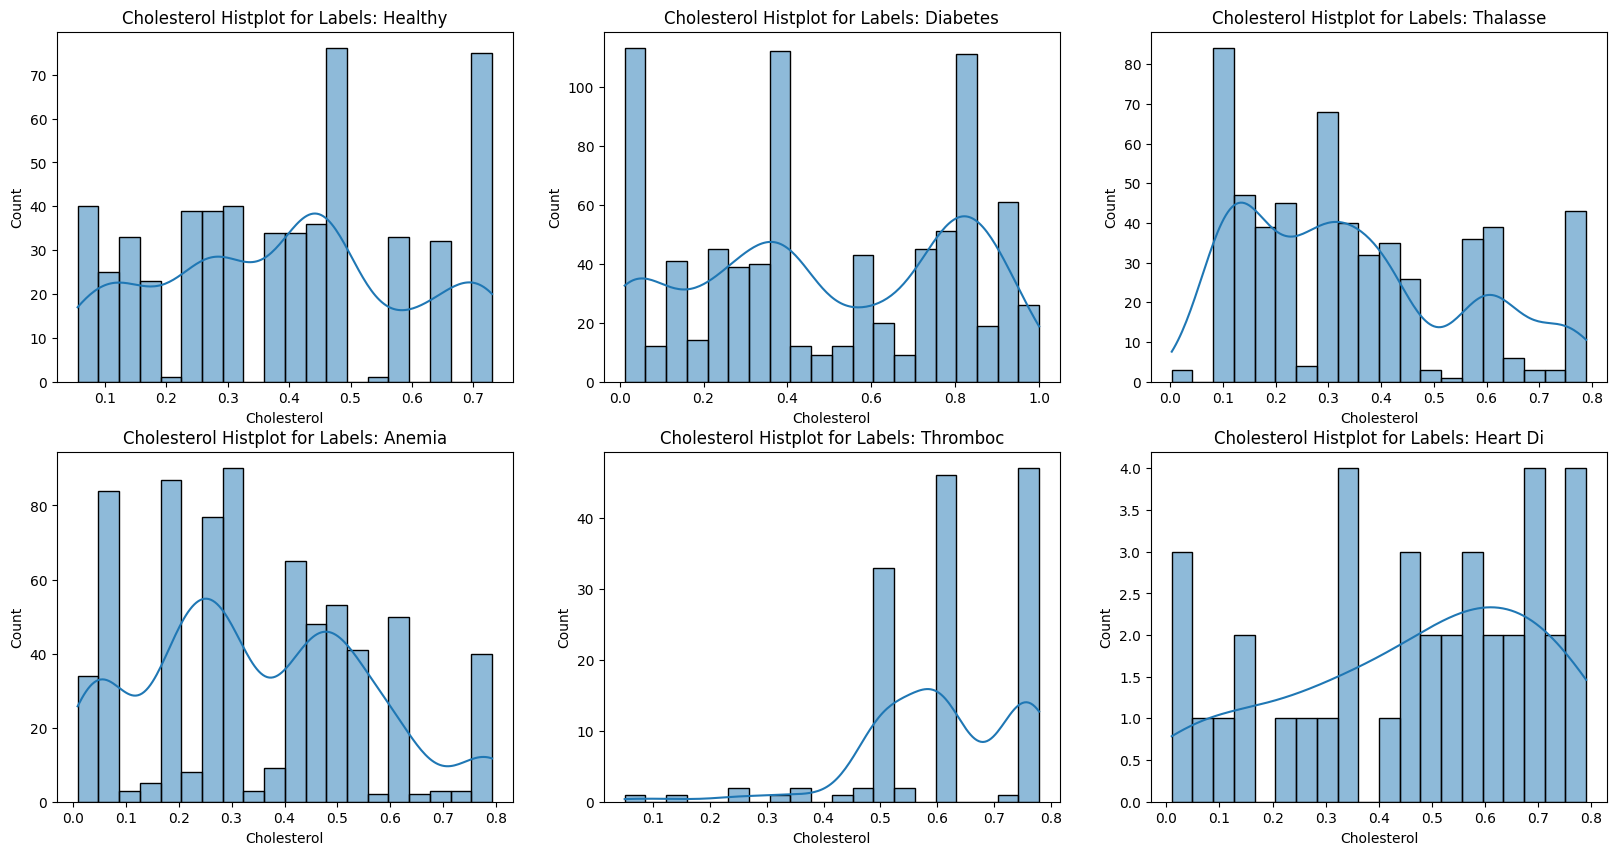

In [18]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Cholesterol', bins=20, kde=True)
    plt.title(f'Cholesterol Histplot for Labels: {label_names[i]}')
plt.tight_layout

3.  Hemoglobin (g/dL)

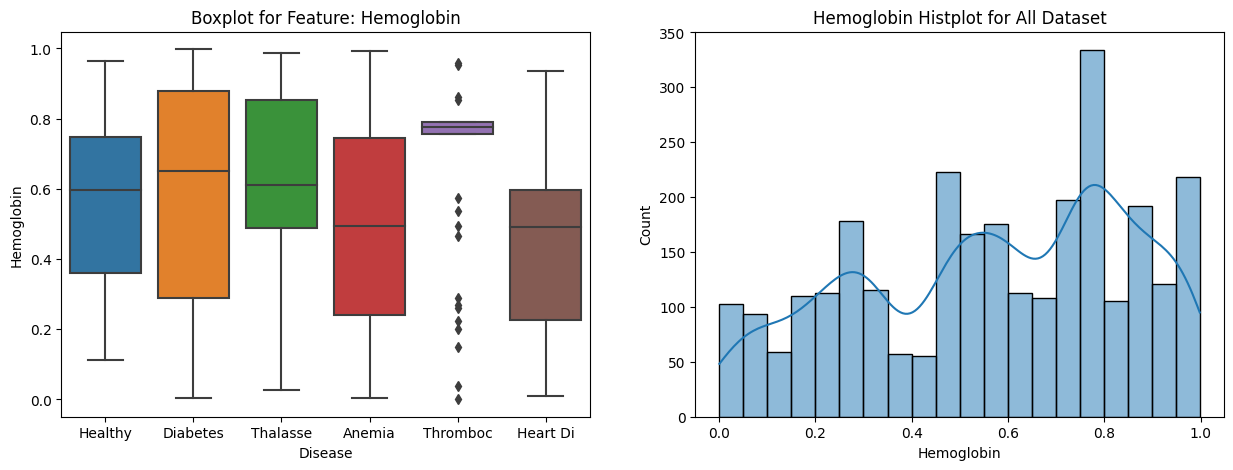

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Hemoglobin'], data=df)
plt.title(f'Boxplot for Feature: Hemoglobin')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Hemoglobin'],bins=20,kde=True)
plt.title(f'Hemoglobin Histplot for All Dataset')
plt.show()

From the Hemoglobin Boxplot, it's evident that the distribution varies across different labels: 'Healthy' instances predominantly range from 0.38 to 0.75, averaging 0.6; 'Diabetes' instances span 0.3 to 0.9, with an average of 0.65; 'Thalasse' instances fall between 0.5 and 0.88, with an average slightly exceeding 0.6; 'Anemia' instances range from 0.25 to 0.75, averaging 0.5; 'Thromboc' instances are concentrated mainly around 0.78 to 0.8, with an average close to 0.79, yet scattered outliers exist from 0.0 to 0.6 and 0.88 to 1.0; finally, 'Heart Disease' instances span 0.2 to 0.6, with an average of 0.5.

Based on the Hemoglobin histplot for the entire dataset, it appears that the distribution is primarily concentrated in the range of 0.4 to 0.8, with the highest values around 0.7 to 0.8. Nearly all the labels fall within this range. This suggests that this feature has a significant effect on the instance distribution of all the labels, especially for 'Thromboc', as both the majority distribution and the average value lie fully within that range.

Below is the detailed instance distribution of each Labels

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

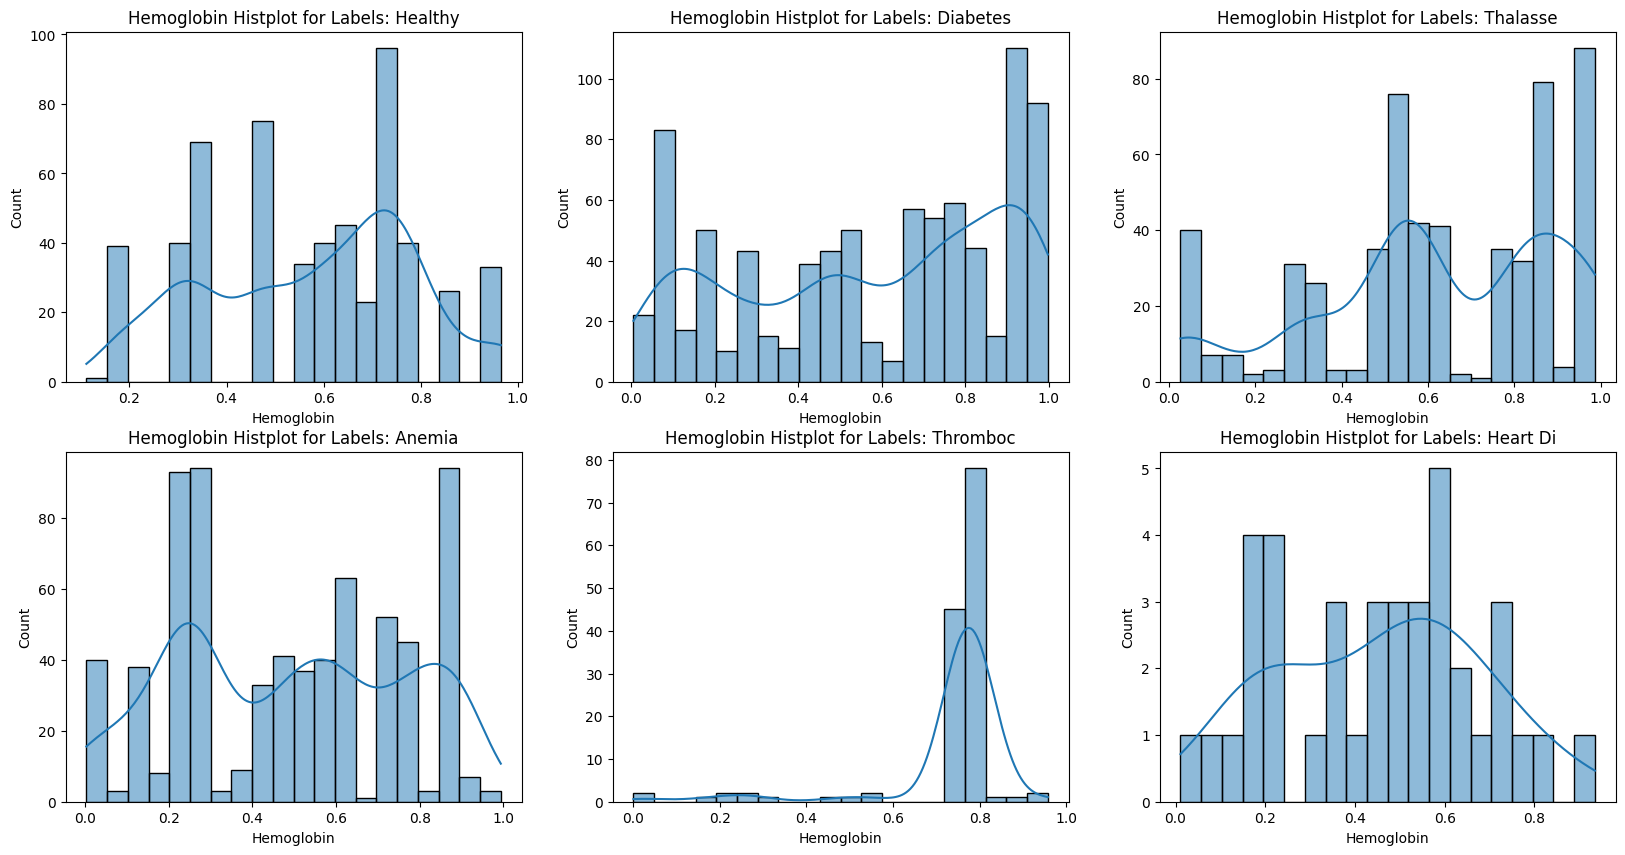

In [20]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Hemoglobin', bins=20, kde=True)
    plt.title(f'Hemoglobin Histplot for Labels: {label_names[i]}')
plt.tight_layout

Similarly, for other features in the dataset

4.  Platelets (per microliter of blood)

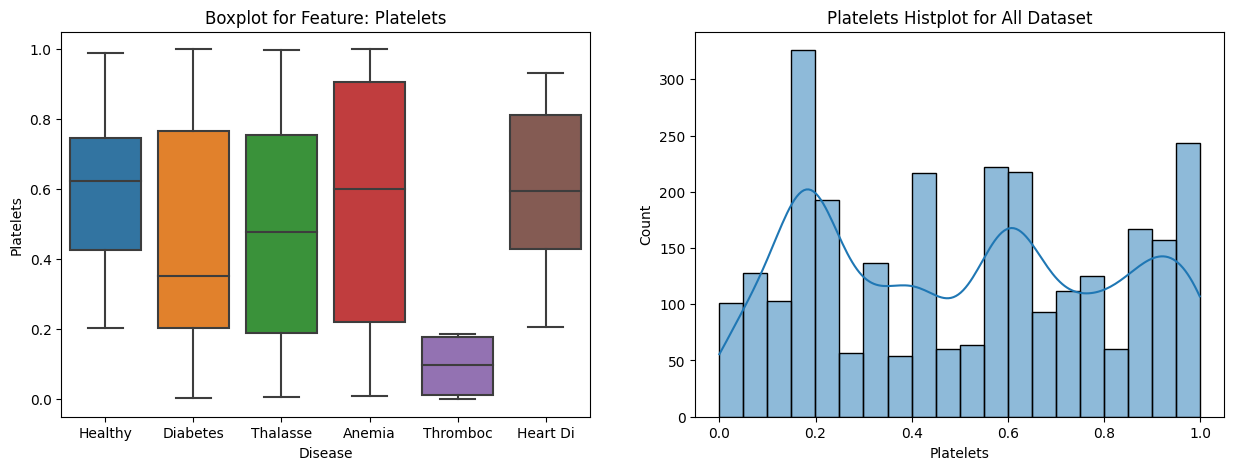

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Platelets'], data=df)
plt.title(f'Boxplot for Feature: Platelets')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Platelets'],bins=20,kde=True)
plt.title(f'Platelets Histplot for All Dataset')
plt.show()

For the Platelets feature, 'Healthy' instances range from 0.41 to 0.75, with an average value of 0.61. 'Diabetes' instances range from 0.2 to 0.79, averaging 0.35. 'Thalasse' instances span from 0.2 to 0.78, with an average of 0.5. 'Anemia' instances vary from 0.2 to 0.9, averaging 0.6. 'Thromboc' instances range from 0.01 to 0.19, with an average of 0.1. 'Heart Di' instances range from 0.41 to 0.8, with an average of 0.6. The highest contribution in the Platelets histplot for the entire dataset is observed around the range of 0.15 to 0.25. This suggests that Platelets will have a stronger effect on the instance distribution of labels such as 'Diabetes', 'Thalasse', 'Anemia', and especially 'Thromboc'.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

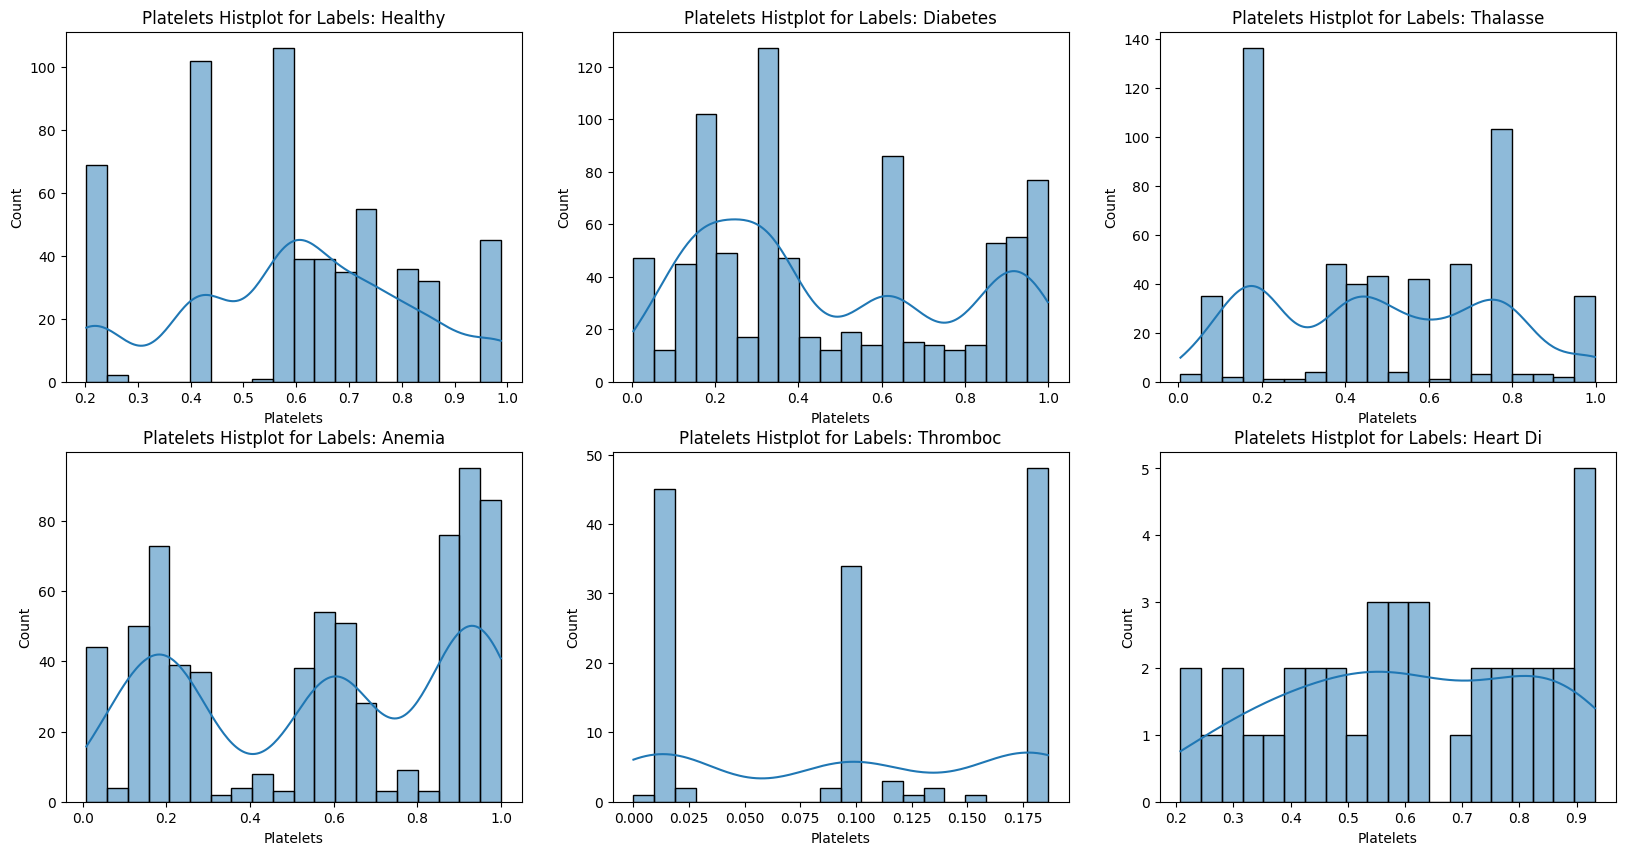

In [22]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Platelets', bins=20, kde=True)
    plt.title(f'Platelets Histplot for Labels: {label_names[i]}')
plt.tight_layout

5.  White Blood Cells (Per cubic millimeter of blood)

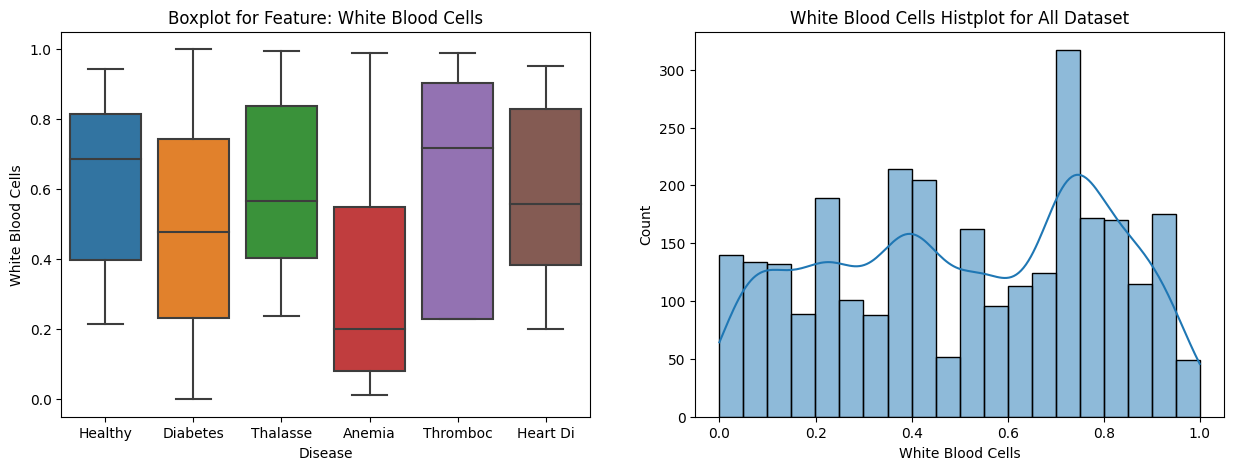

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['White Blood Cells'], data=df)
plt.title(f'Boxplot for Feature: White Blood Cells')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['White Blood Cells'],bins=20,kde=True)
plt.title(f'White Blood Cells Histplot for All Dataset')
plt.show()

For the White Blood Cells feature, 'Healthy' instances exhibit White Blood Cells counts ranging from 0.4 to 0.81, with an average value of 0.7. 'Diabetes' instances range from 0.22 to 0.75, averaging 0.48. 'Thalasse' instances span from 0.4 to 0.82, with an average of 0.58. 'Anemia' instances vary from 0.2 to 0.58, with an average of 0.2. 'Thromboc' instances range from 0.22 to 0.9, with an average of 0.7. 'Heart Di' instances range from 0.4 to 0.81, averaging 0.58. The highest contribution in the White Blood Cells Histplot for the entire dataset is observed around the range of 0.7 to 0.8. This suggests that White Blood Cells will have a strong effect on instance distribution of all labels except for 'Anemia'.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

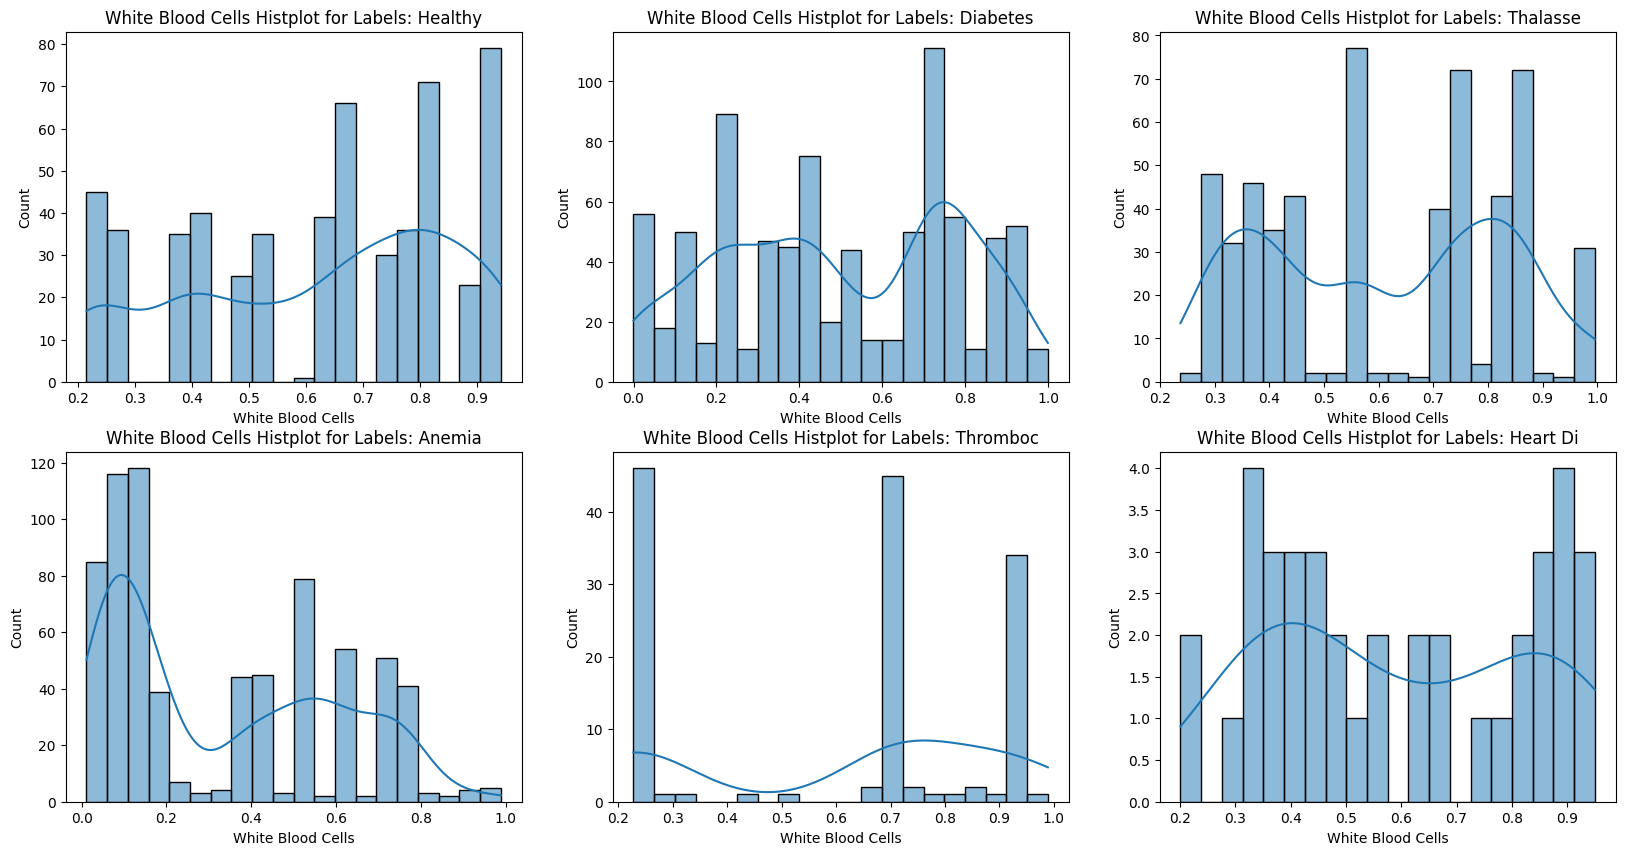

In [24]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='White Blood Cells', bins=20, kde=True)
    plt.title(f'White Blood Cells Histplot for Labels: {label_names[i]}')
plt.tight_layout

6.  Red Blood Cells (Million cells per microliter of blood)

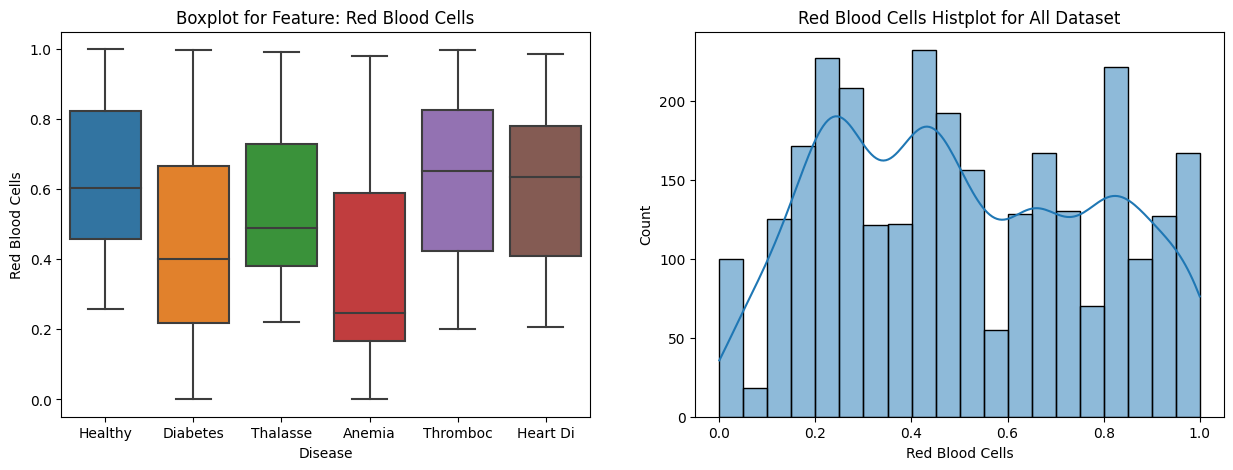

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Red Blood Cells'], data=df)
plt.title(f'Boxplot for Feature: Red Blood Cells')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Red Blood Cells'],bins=20,kde=True)
plt.title(f'Red Blood Cells Histplot for All Dataset')
plt.show()

For the Red Blood Cells feature, 'Healthy' instances exhibit Red Blood Cells counts ranging from 0.35 to 0.81, with an average value of 0.6. 'Diabetes' instances range from 0.2 to 0.68, averaging 0.4. 'Thalasse' instances span from 0.4 to 0.72, with an average of 0.5. 'Anemia' instances vary from 0.18 to 0.59, with an average of 0.21. 'Thromboc' instances range from 0.41 to 0.81, with an average of 0.63. 'Heart Di' instances range from 0.4 to 0.78, averaging 0.62. The highest contribution in the Red Blood Cells Histplot for the entire dataset is observed around the range of 0.2 to 0.5. This suggests that Red Blood Cells will have a strong effect on instance contribution of all labels especially 'Diabetes', 'Thalasse' and 'Anemia'.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

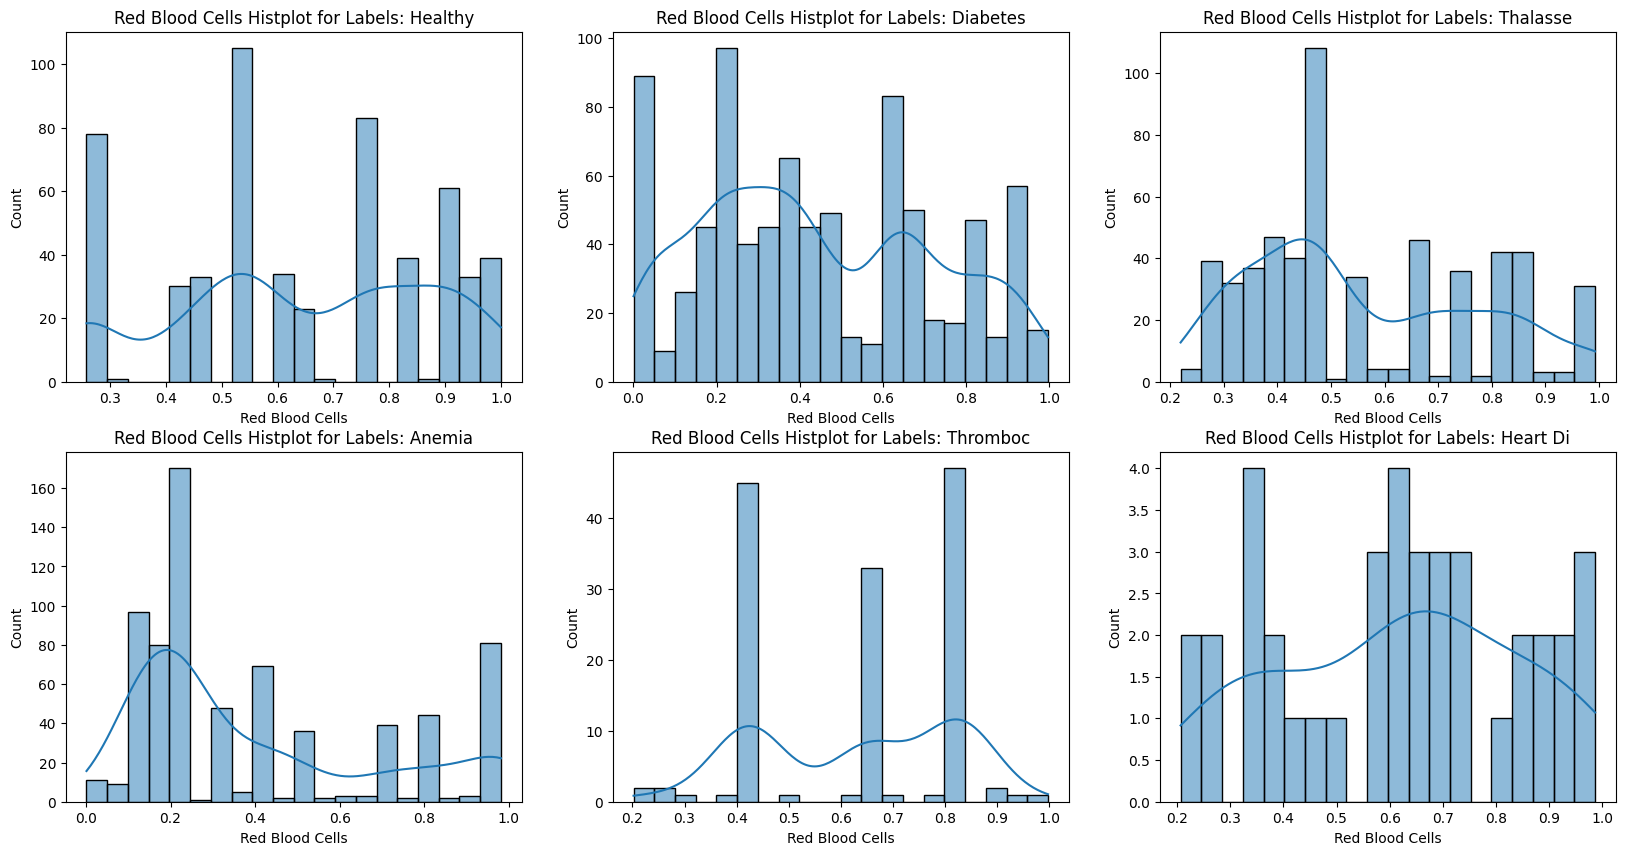

In [26]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Red Blood Cells', bins=20, kde=True)
    plt.title(f'Red Blood Cells Histplot for Labels: {label_names[i]}')
plt.tight_layout

7.  Hematocrit (Percentage)

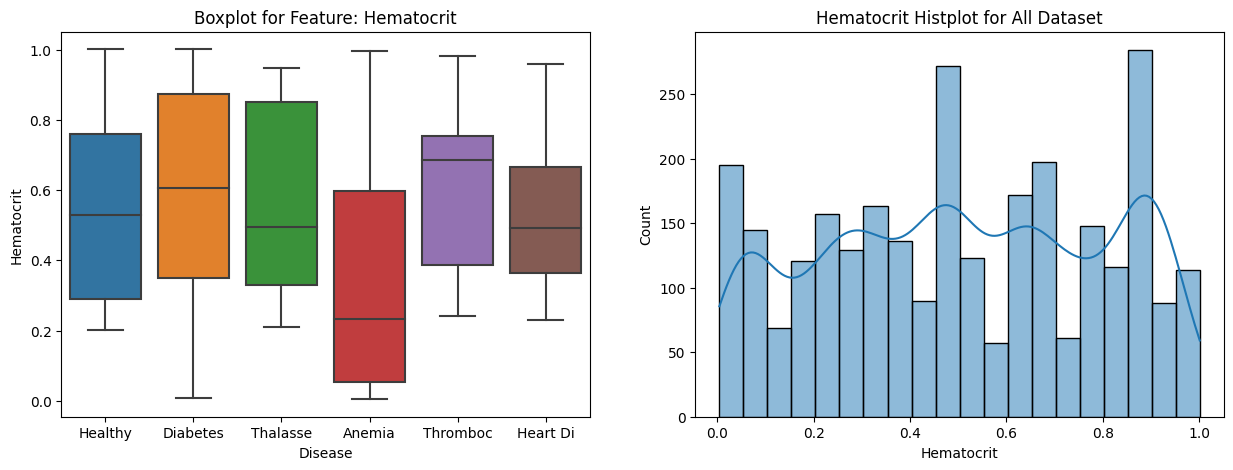

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Hematocrit'], data=df)
plt.title(f'Boxplot for Feature: Hematocrit')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Hematocrit'],bins=20,kde=True)
plt.title(f'Hematocrit Histplot for All Dataset')
plt.show()

For the Hematocrit feature, 'Healthy' instances exhibit Hematocrit counts ranging from 0.3 to 0.75, with an average value of 0.55. 'Diabetes' instances range from 0.4 to 0.9, averaging 0.6. 'Thalasse' instances span from 0.35 to 0.85, with an average of 0.5. 'Anemia' instances vary from 0.05 to 0.6, with an average of 0.21. 'Thromboc' instances range from 0.39 to 0.75, with an average of 0.7. 'Heart Di' instances range from 0.38 to 0.69, averaging 0.5. The highest contribution in the Hematocrit Histplot for the entire dataset is observed around the range of 0.45 to 0.9. This suggests that Hematocrit will have a strong effect on instance distribution of all labels with the least is 'Anemia' while it's average is out of the range.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

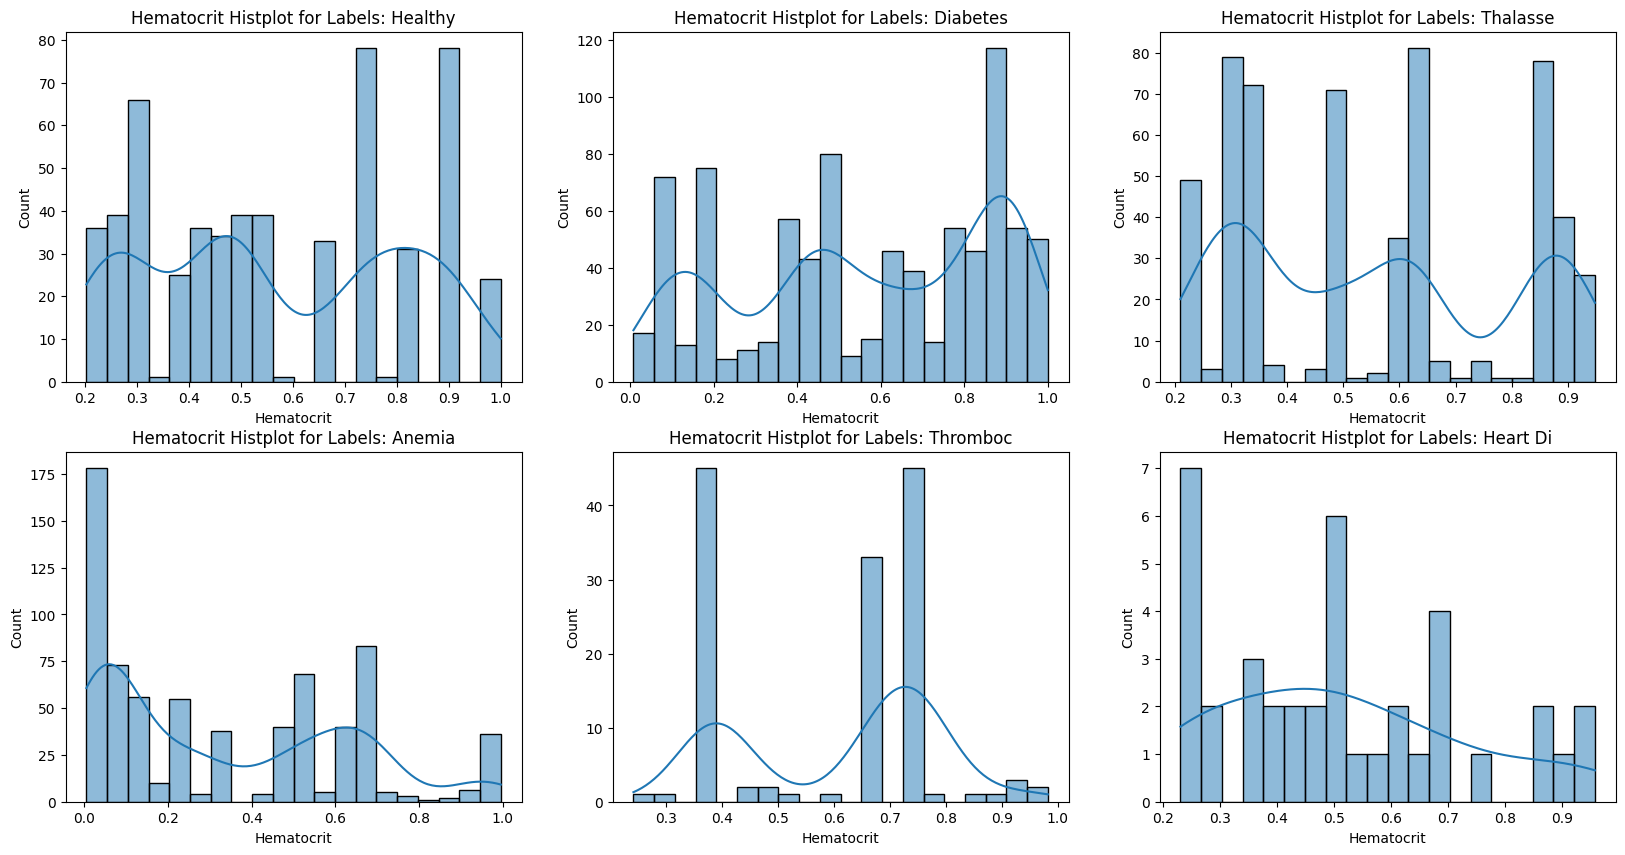

In [28]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Hematocrit', bins=20, kde=True)
    plt.title(f'Hematocrit Histplot for Labels: {label_names[i]}')
plt.tight_layout

8.  Mean Corpuscular Volume (Femtoliters)

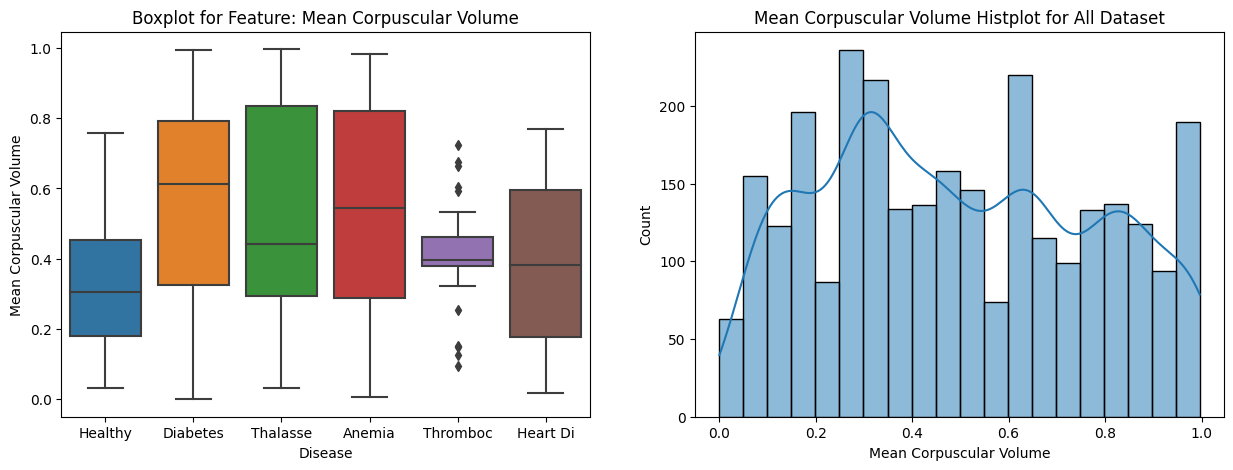

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Mean Corpuscular Volume'], data=df)
plt.title(f'Boxplot for Feature: Mean Corpuscular Volume')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Mean Corpuscular Volume'],bins=20,kde=True)
plt.title(f'Mean Corpuscular Volume Histplot for All Dataset')
plt.show()

For the Mean Corpuscular Volume feature, 'Healthy' instances exhibit Mean Corpuscular Volume counts ranging from 0.19 to 0.45, with an average value of 0.3. 'Diabetes' instances range from 0.35 to 0.8, averaging 0.61. 'Thalasse' instances span from 0.3 to 0.8, with an average of 0.55. 'Anemia' instances vary from 0.3 to 0.8, with an average of 0.58. 'Thromboc' instances range from 0.39 to 0.45, with an average of 0.4. 'Heart Di' instances range from 0.2 to 0.6, averaging 0.39. The highest contribution in the Mean Corpuscular Volume Histplot for the entire dataset is observed around the range of 0.2 to 0.4. This suggests that Mean Corpuscular Volume will have a strong effect on instance distribution of all labels especially 'Healthy'

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

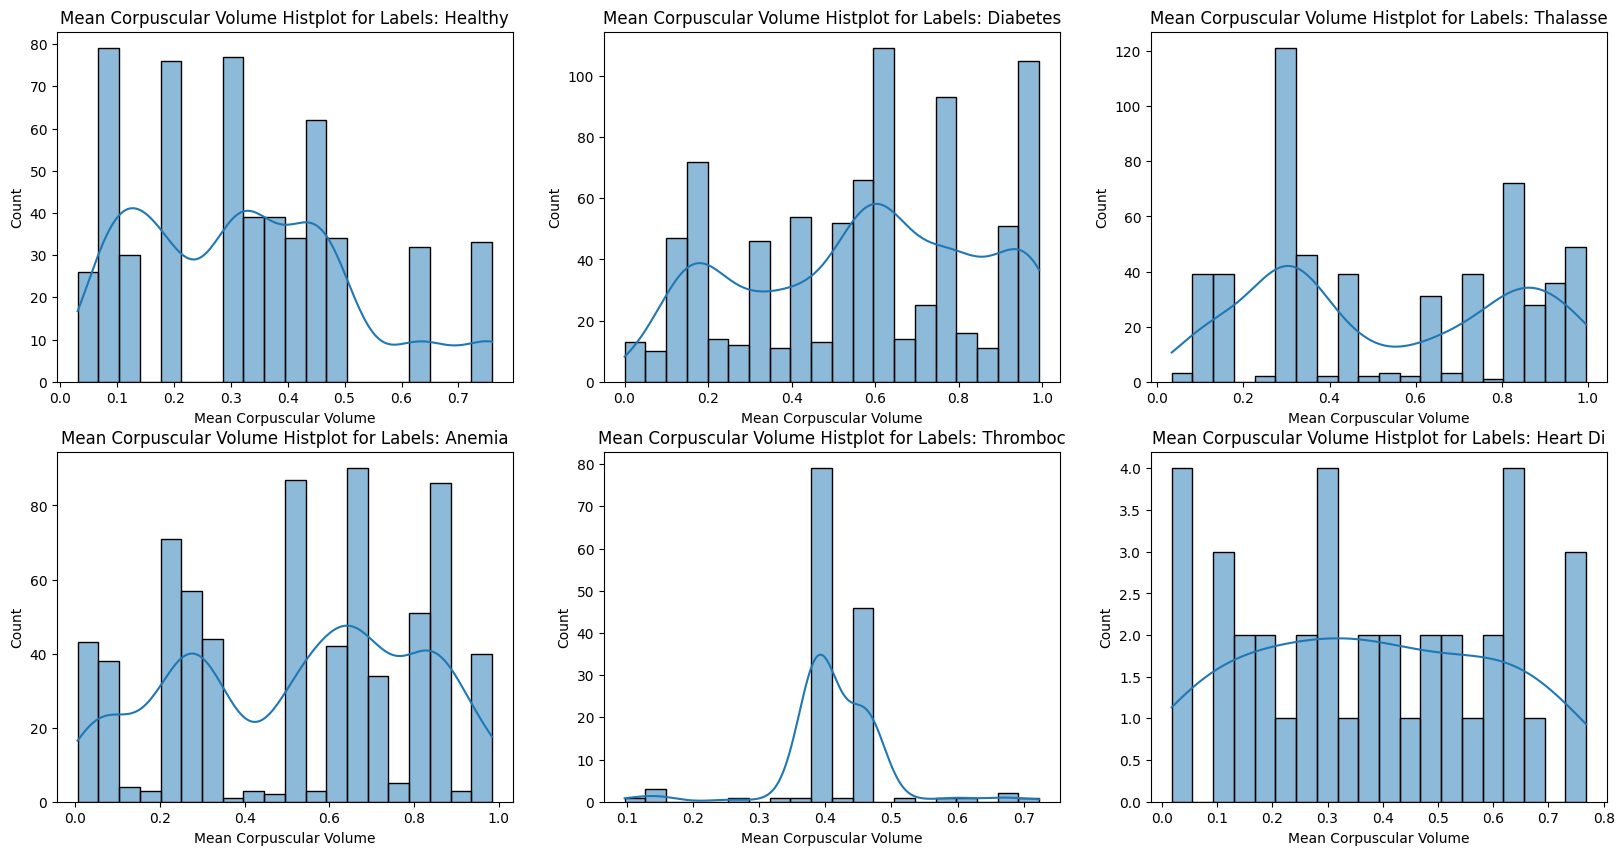

In [30]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Mean Corpuscular Volume', bins=20, kde=True)
    plt.title(f'Mean Corpuscular Volume Histplot for Labels: {label_names[i]}')
plt.tight_layout

9.  Mean Corpuscular Hemoglobin (Picograms)

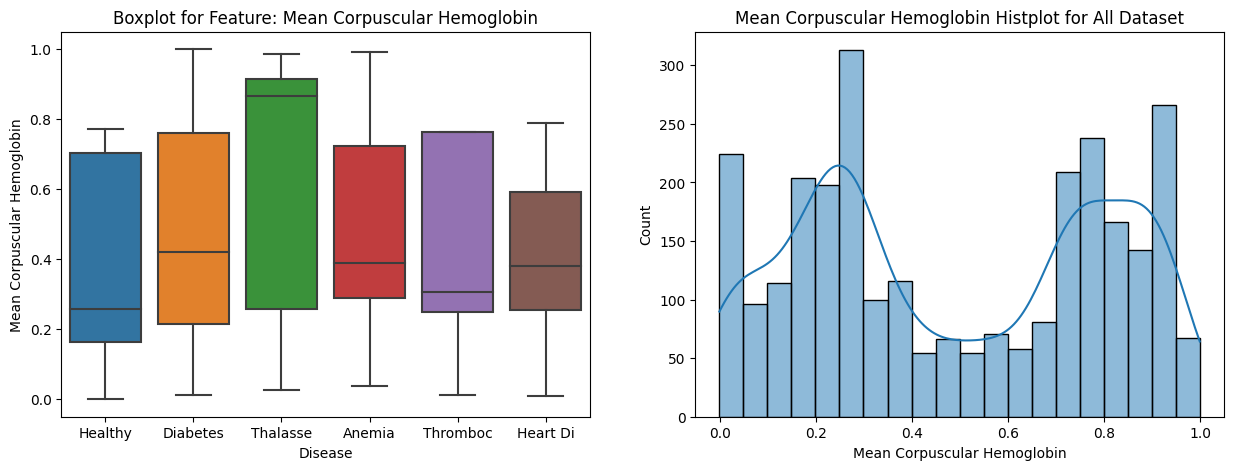

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Mean Corpuscular Hemoglobin'], data=df)
plt.title(f'Boxplot for Feature: Mean Corpuscular Hemoglobin')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Mean Corpuscular Hemoglobin'],bins=20,kde=True)
plt.title(f'Mean Corpuscular Hemoglobin Histplot for All Dataset')
plt.show()

For the Mean Corpuscular Hemoglobin feature, 'Healthy' instances exhibit Mean Corpuscular Hemoglobin counts ranging from 0.18 to 0.7, with an average value of 0.25. 'Diabetes' instances range from 0.21 to 0.78, averaging 0.41. 'Thalasse' instances span from 0.25 to 0.9, with an average of 0.85. 'Anemia' instances vary from 0.3 to 0.7, with an average of 0.4. 'Thromboc' instances range from 0.25 to 0.75, with an average of 0.3. 'Heart Di' instances range from 0.25 to 0.59, averaging 0.39. The highest contribution in the Mean Corpuscular Hemoglobin Histplot for the entire dataset is observed around the range of 0.1 to 0.3 and 0.7 to 0.95. This suggests that Mean Corpuscular Hemoglobin will have a strong effect on instance distribution of all labels especially 'Healthy', 'Thalasse'

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

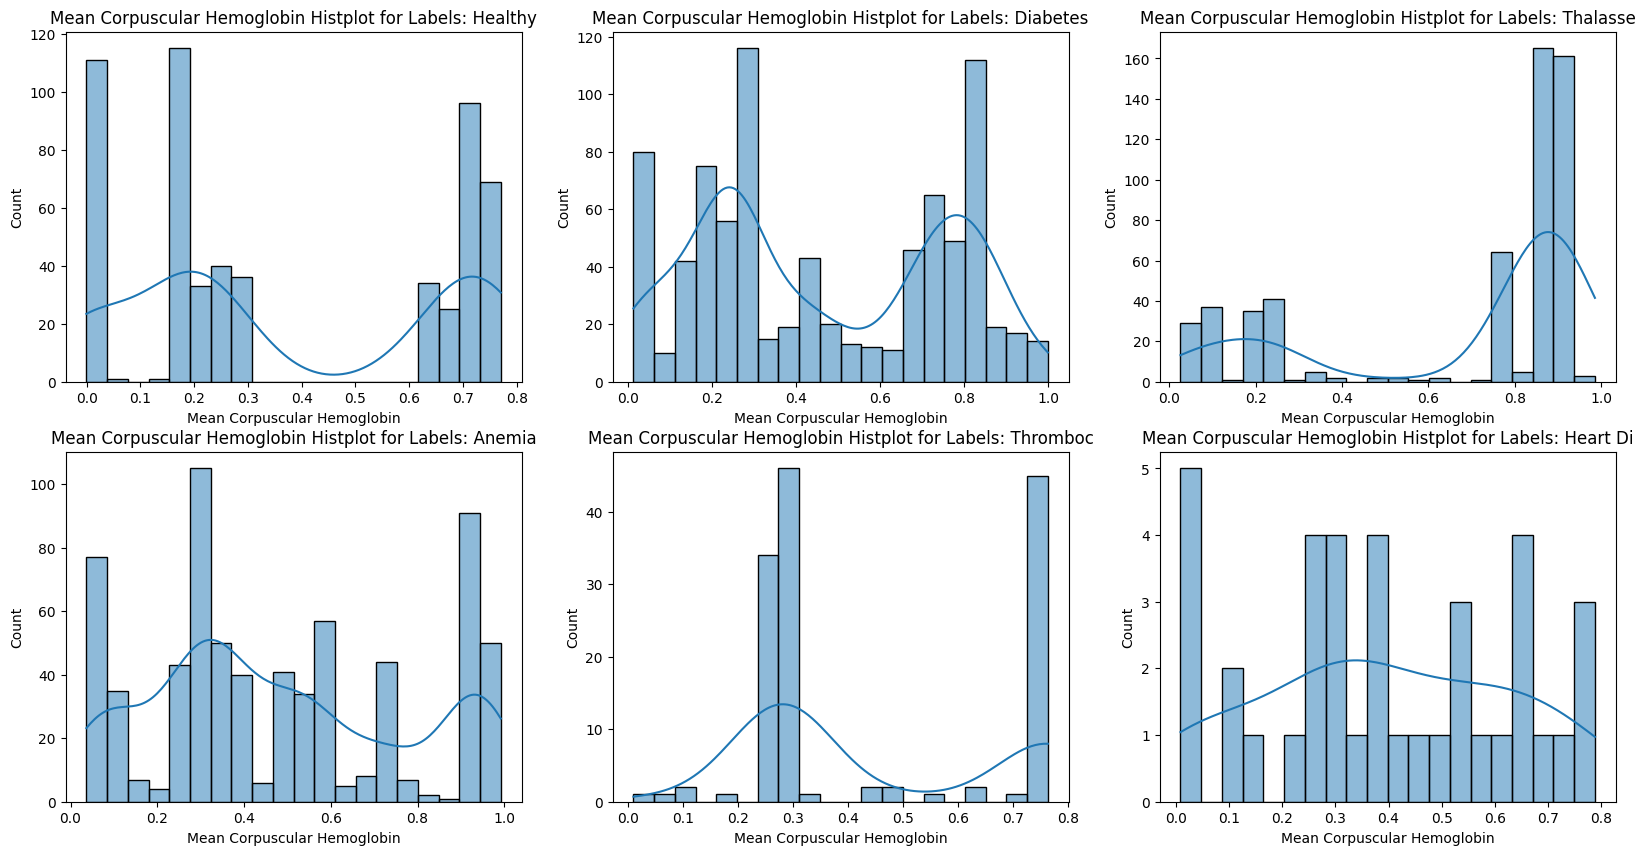

In [32]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Mean Corpuscular Hemoglobin', bins=20, kde=True)
    plt.title(f'Mean Corpuscular Hemoglobin Histplot for Labels: {label_names[i]}')
plt.tight_layout

10. Mean Corpuscular Hemoglobin Concentration (Grams per deciliter)

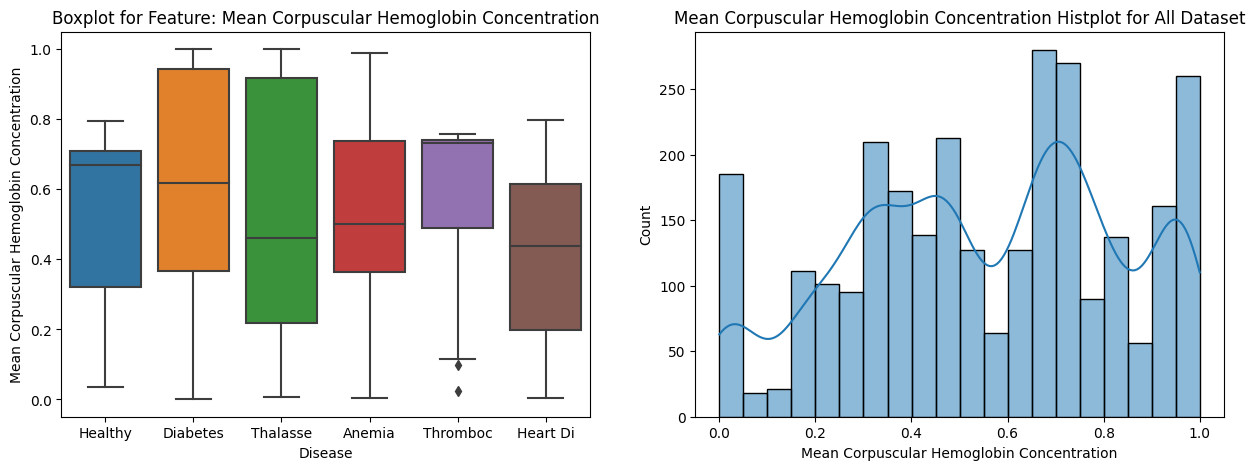

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Mean Corpuscular Hemoglobin Concentration'], data=df)
plt.title(f'Boxplot for Feature: Mean Corpuscular Hemoglobin Concentration')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Mean Corpuscular Hemoglobin Concentration'],bins=20,kde=True)
plt.title(f'Mean Corpuscular Hemoglobin Concentration Histplot for All Dataset')
plt.show()

For the Mean Corpuscular Hemoglobin Concentration feature, 'Healthy' instances exhibit Mean Corpuscular Hemoglobin Concentration counts ranging from 0.35 to 0.7, with an average value of 0.65. 'Diabetes' instances range from 0.39 to 0.95, averaging 0.61. 'Thalasse' instances span from 0.2 to 0.92, with an average of 0.45. 'Anemia' instances vary from 0.38 to 0.71, with an average of 0.5. 'Thromboc' instances range from 0.49 to 0.76, with an average of 0.75. 'Heart Di' instances range from 0.19 to 0.61, averaging 0.41. The highest contribution in the Mean Corpuscular Hemoglobin Concentration Histplot for the entire dataset is observed around the range of 0.65 to 0.75. This suggests that Mean Corpuscular Hemoglobin Concentration will have a strong effect on instance distribution of all labels especially 'Healthy', 'Thromboc' ecxept 'Heart Di'

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

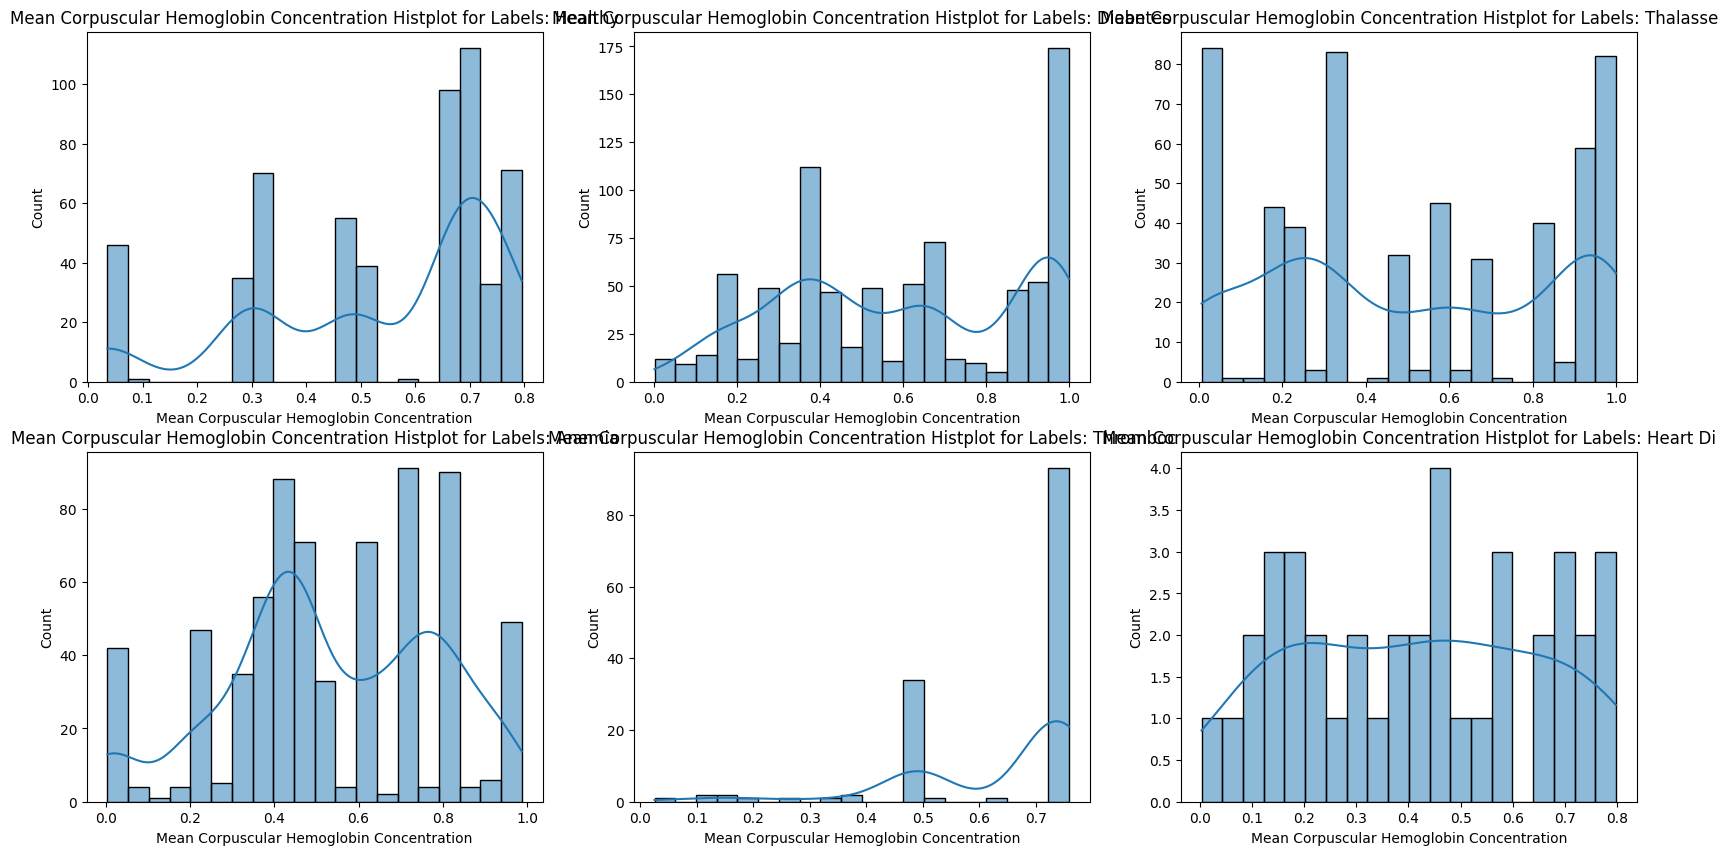

In [34]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Mean Corpuscular Hemoglobin Concentration', bins=20, kde=True)
    plt.title(f'Mean Corpuscular Hemoglobin Concentration Histplot for Labels: {label_names[i]}')
plt.tight_layout

11. Insulin (microU/mL)

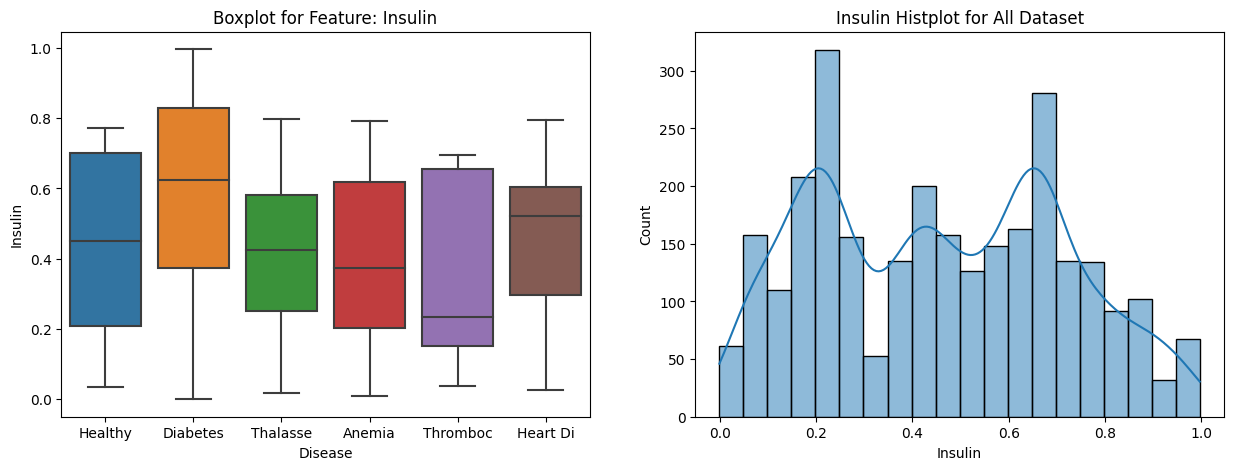

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Insulin'], data=df)
plt.title(f'Boxplot for Feature: Insulin')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Insulin'],bins=20,kde=True)
plt.title(f'Insulin Histplot for All Dataset')
plt.show()

For the Insulin feature, 'Healthy' instances exhibit Insulin counts ranging from 0.2 to 0.7, with an average value of 0.45. 'Diabetes' instances range from 0.39 to 0.82, averaging 0.61. 'Thalasse' instances span from 0.25 to 0.59, with an average of 0.43. 'Anemia' instances vary from 0.2 to 0.6, with an average of 0.35. 'Thromboc' instances range from 0.15 to 0.65, with an average of 0.23. 'Heart Di' instances range from 0.3 to 0.6, averaging 0.5. The highest contribution in the Insulin Histplot for the entire dataset is observed around the range of 0.15 to 0.25. This suggests that Insulin will have a strong effect on instance distribution of all labels especially 'Thromboc' ecxept 'Diabetes'

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

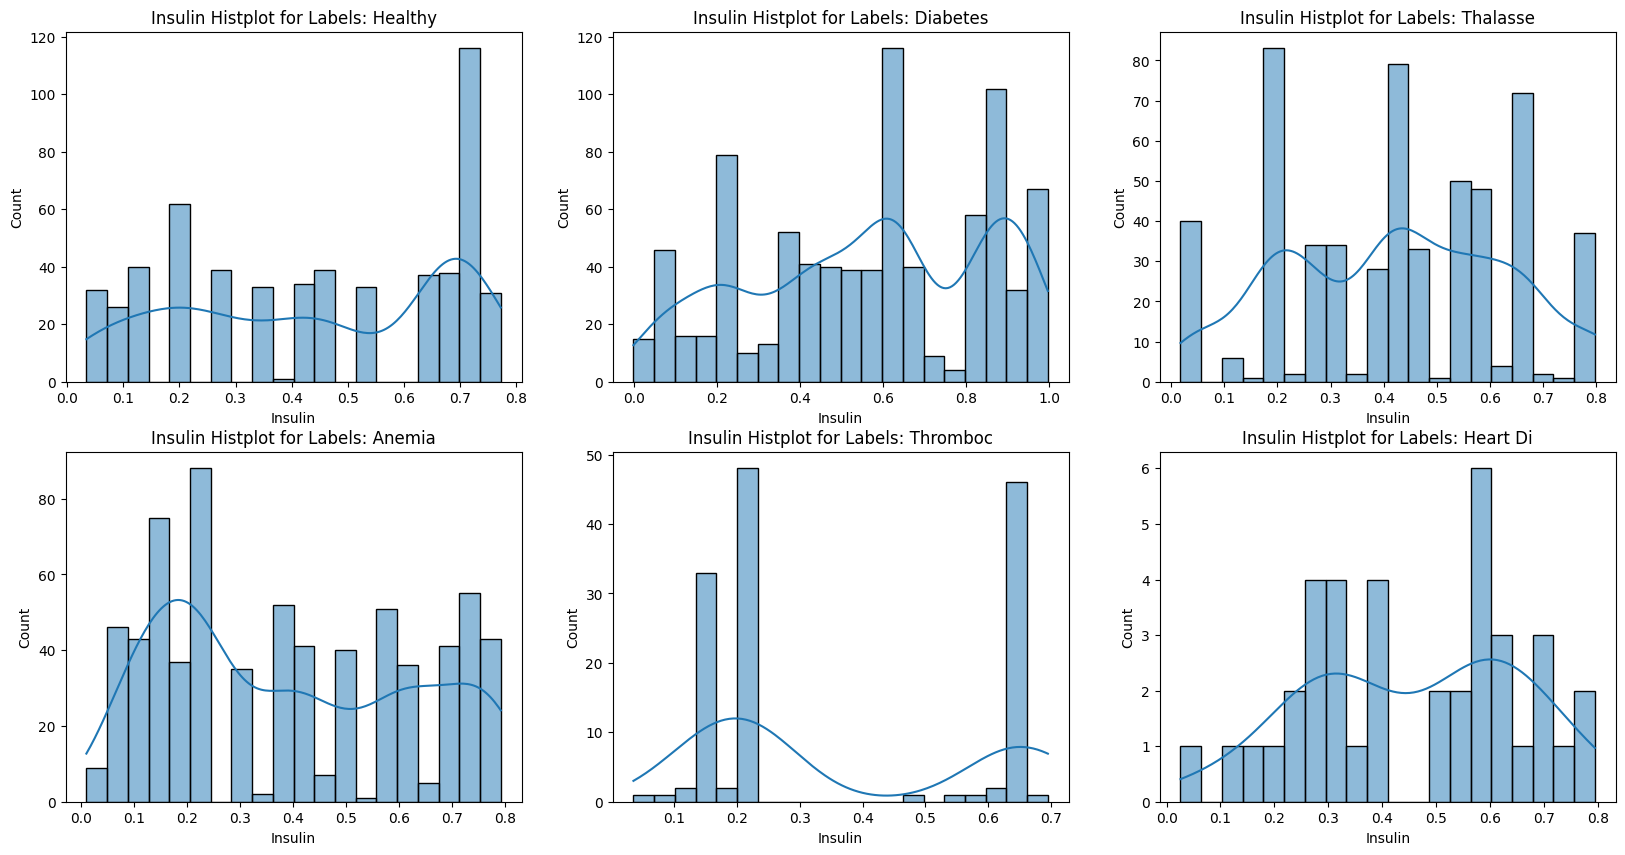

In [36]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Insulin', bins=20, kde=True)
    plt.title(f'Insulin Histplot for Labels: {label_names[i]}')
plt.tight_layout

12. BMI (kg/m^2)

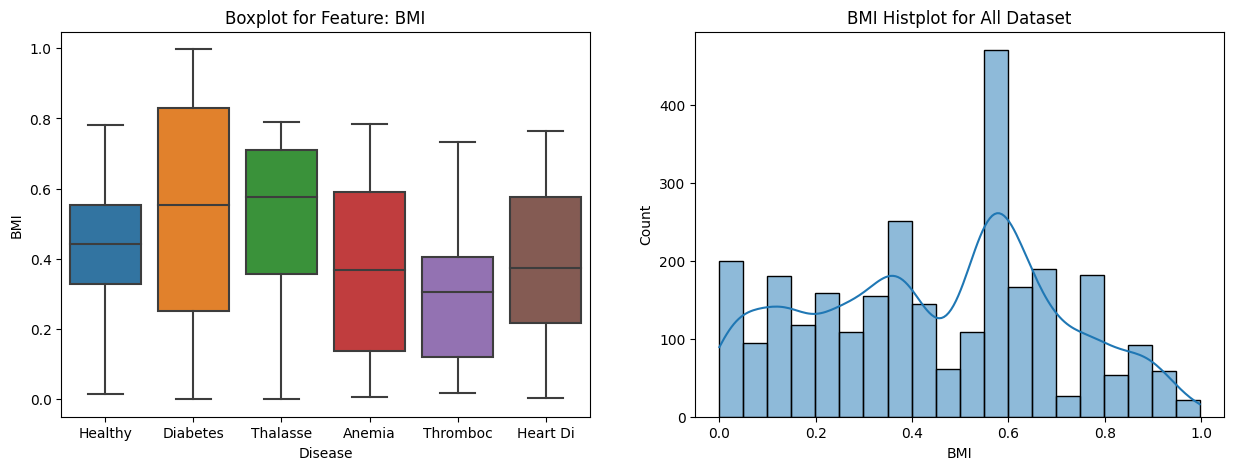

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['BMI'], data=df)
plt.title(f'Boxplot for Feature: BMI')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['BMI'],bins=20,kde=True)
plt.title(f'BMI Histplot for All Dataset')
plt.show()

For the BMI feature, 'Healthy' instances exhibit BMI counts ranging from 0.35 to 0.55, with an average value of 0.45. 'Diabetes' instances range from 0.25 to 0.85, averaging 0.55. 'Thalasse' instances span from 0.38 to 0.7, with an average of 0.56. 'Anemia' instances vary from 0.15 to 0.6, with an average of 0.38. 'Thromboc' instances range from 0.1 to 0.4, with an average of 0.3. 'Heart Di' instances range from 0.2 to 0.55, averaging 0.38. The highest contribution in the BMI Histplot for the entire dataset is observed around the range of 0.55 to 0.7. This suggests that BMI will have a strong effect on instance distribution of all labels especially 'Diabetes', 'Thalasse' ecxept 'Thromboc'

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

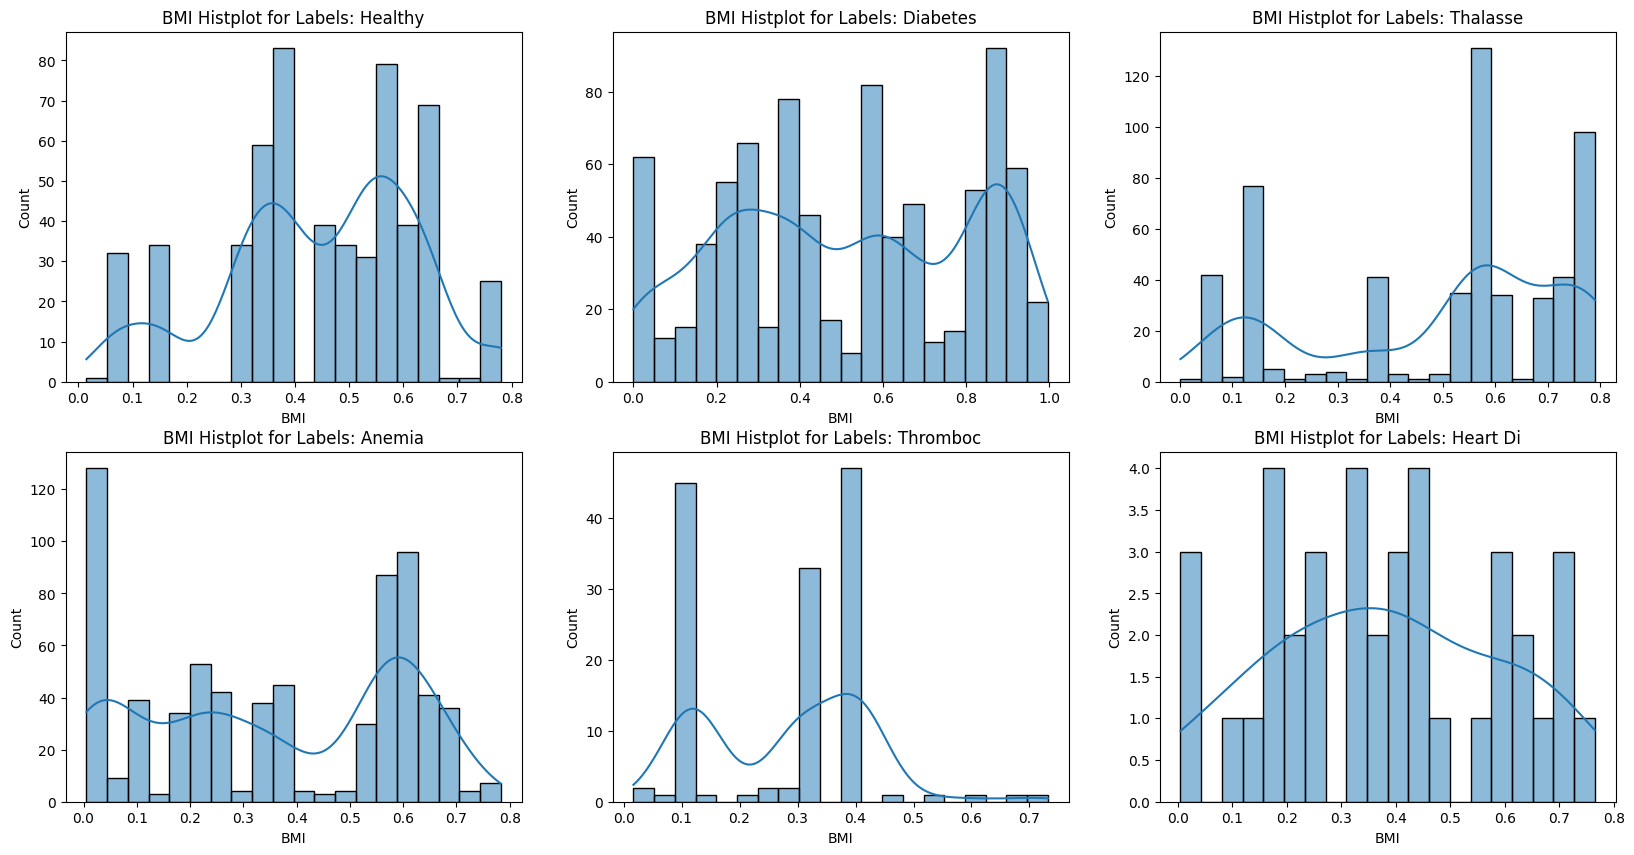

In [38]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='BMI', bins=20, kde=True)
    plt.title(f'BMI Histplot for Labels: {label_names[i]}')
plt.tight_layout

13. Systolic Blood Pressure (mmHg)

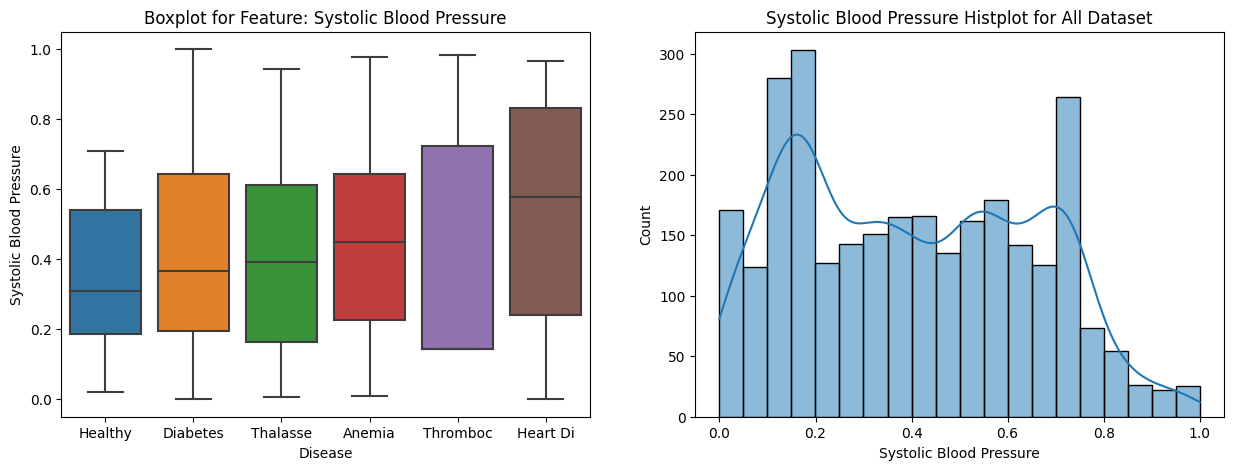

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Systolic Blood Pressure'], data=df)
plt.title(f'Boxplot for Feature: Systolic Blood Pressure')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Systolic Blood Pressure'],bins=20,kde=True)
plt.title(f'Systolic Blood Pressure Histplot for All Dataset')
plt.show()

For the Systolic Blood Pressure feature, 'Healthy' instances exhibit Systolic Blood Pressure counts ranging from 0.19 to 0.55, with an average value of 0.3. 'Diabetes' instances range from 0.2 to 0.65, averaging 0.35. 'Thalasse' instances span from 0.15 to 0.61, with an average of 0.39. 'Anemia' instances vary from 0.25 to 0.65, with an average of 0.4. 'Thromboc' instances range from 0.15 to 0.7, with an average of 0.15. 'Heart Di' instances range from 0.25 to 0.85, averaging 0.58. The highest contribution in the Systolic Blood Pressure Histplot for the entire dataset is observed around the range of 0.1 to 0.2. This suggests that Systolic Blood Pressure will have a strong effect on instance distribution of all labels especially 'Thromboc'

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

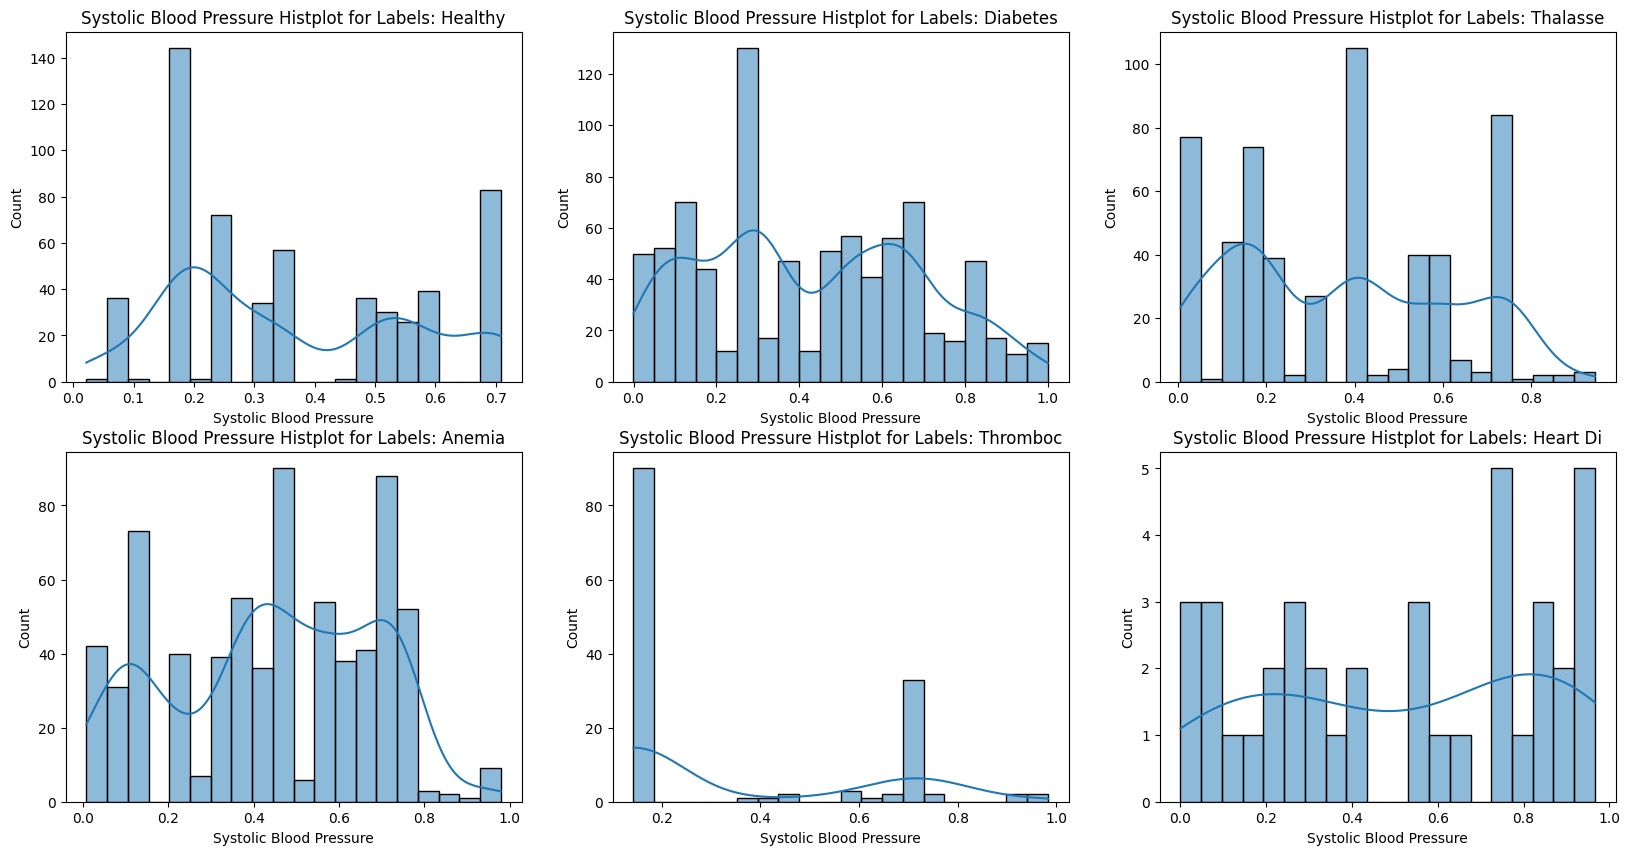

In [40]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Systolic Blood Pressure', bins=20, kde=True)
    plt.title(f'Systolic Blood Pressure Histplot for Labels: {label_names[i]}')
plt.tight_layout

14. Diastolic Blood Pressure (mmHg)

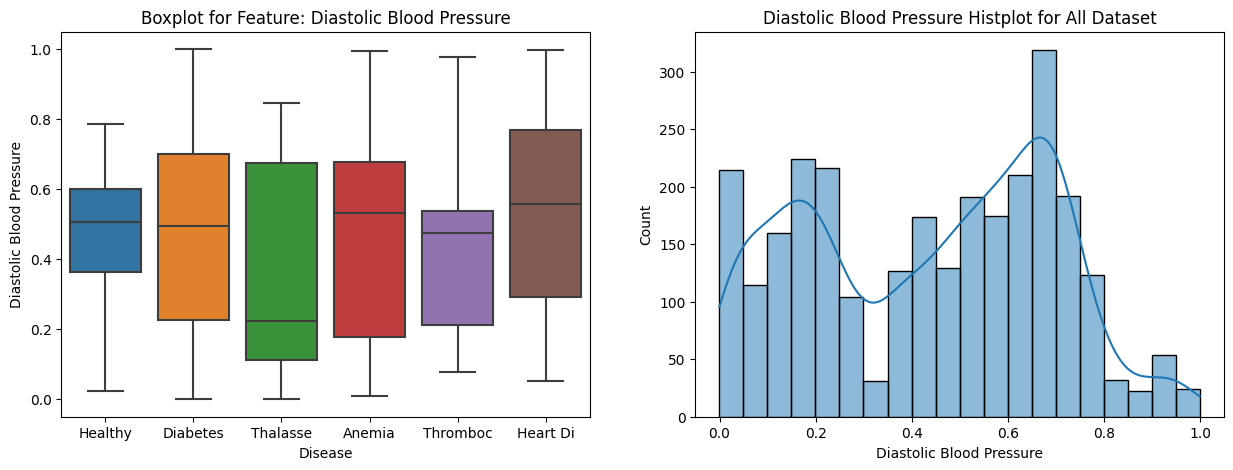

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Diastolic Blood Pressure'], data=df)
plt.title(f'Boxplot for Feature: Diastolic Blood Pressure')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Diastolic Blood Pressure'],bins=20,kde=True)
plt.title(f'Diastolic Blood Pressure Histplot for All Dataset')
plt.show()

For the Diastolic Blood Pressure feature, 'Healthy' instances exhibit Diastolic Blood Pressure counts ranging from 0.35 to 0.6, with an average value of 0.51. 'Diabetes' instances range from 0.22 to 0.7, averaging 0.5. 'Thalasse' instances span from 0.1 to 0.7, with an average of 0.22. 'Anemia' instances vary from 0.18 to 0.7, with an average of 0.52. 'Thromboc' instances range from 0.2 to 0.55, with an average of 0.5. 'Heart Di' instances range from 0.3 to 0.78, averaging 0.55. The highest contribution in the Diastolic Blood Pressure Histplot for the entire dataset is observed around the range of 0.4 to 0.8. This suggests that Diastolic Blood Pressure will have a strong effect on instance distribution of all labels with the least is 'Thalasse' while it's average is out of the range.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

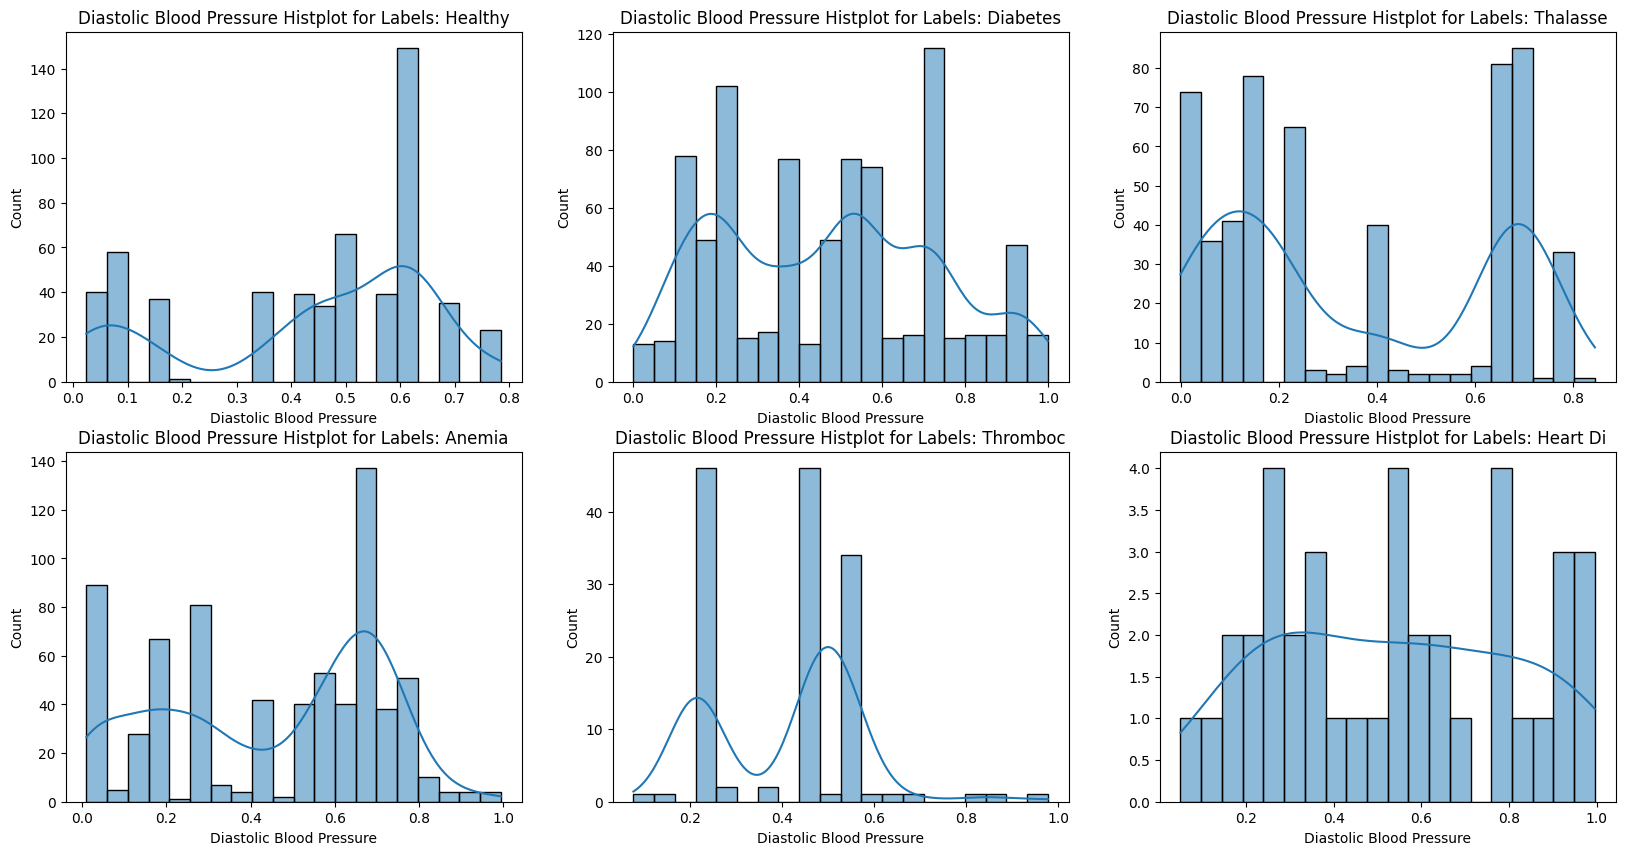

In [42]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Diastolic Blood Pressure', bins=20, kde=True)
    plt.title(f'Diastolic Blood Pressure Histplot for Labels: {label_names[i]}')
plt.tight_layout

15. Triglycerides (mg/dL)

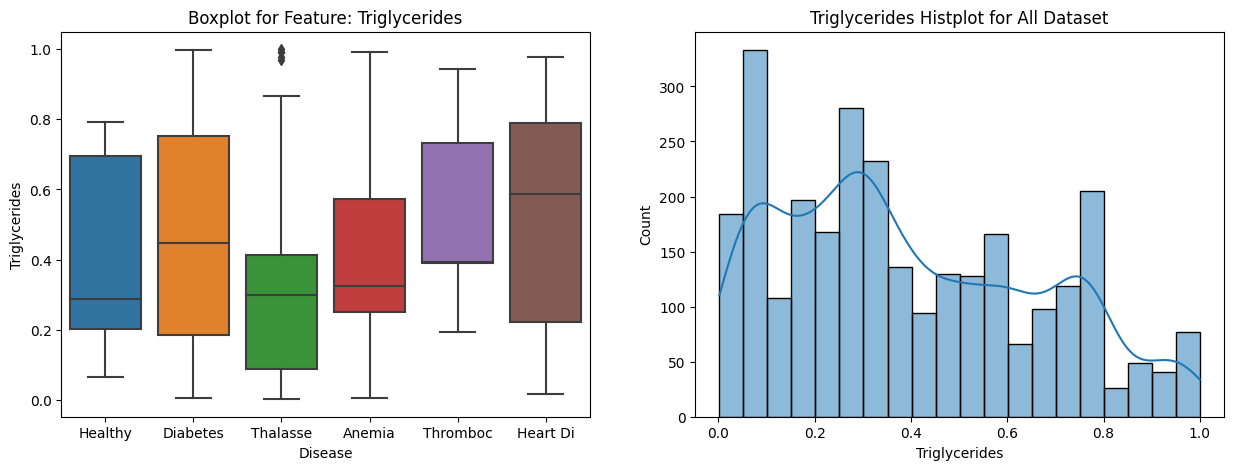

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Triglycerides'], data=df)
plt.title(f'Boxplot for Feature: Triglycerides')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Triglycerides'],bins=20,kde=True)
plt.title(f'Triglycerides Histplot for All Dataset')
plt.show()

For the Triglycerides feature, 'Healthy' instances exhibit Triglycerides counts ranging from 0.2 to 0.7, with an average value of 0.3. 'Diabetes' instances range from 0.2 to 0.75, averaging 0.45. 'Thalasse' instances span from 0.1 to 0.41, with an average of 0.3. 'Anemia' instances vary from 0.25 to 0.55, with an average of 0.33. 'Thromboc' instances range from 0.4 to 0.75, with an average of 0.4. 'Heart Di' instances range from 0.21 to 0.79, averaging 0.59. The highest contribution in the Triglycerides Histplot for the entire dataset is observed around the range of 0.0 to 0.4. This suggests that Triglycerides will have a strong effect on instance distribution of all labels especially 'Healthy', 'Diabetes', 'Thalasse', 'Anemia' and 'Thromboc'.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

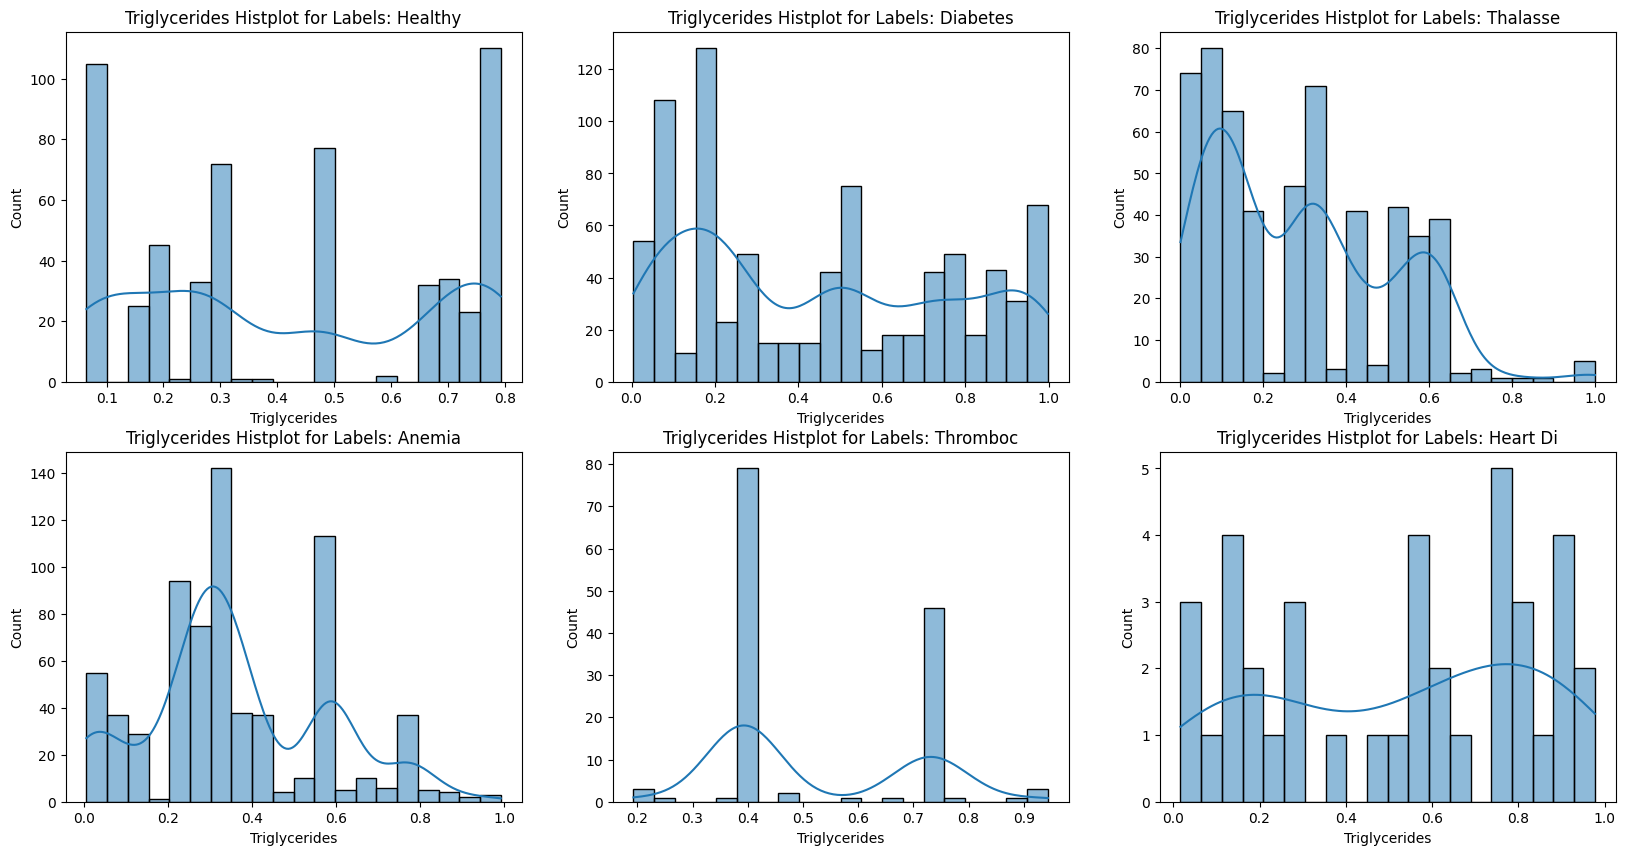

In [44]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Triglycerides', bins=20, kde=True)
    plt.title(f'Triglycerides Histplot for Labels: {label_names[i]}')
plt.tight_layout

16. HbA1c (Percentage)

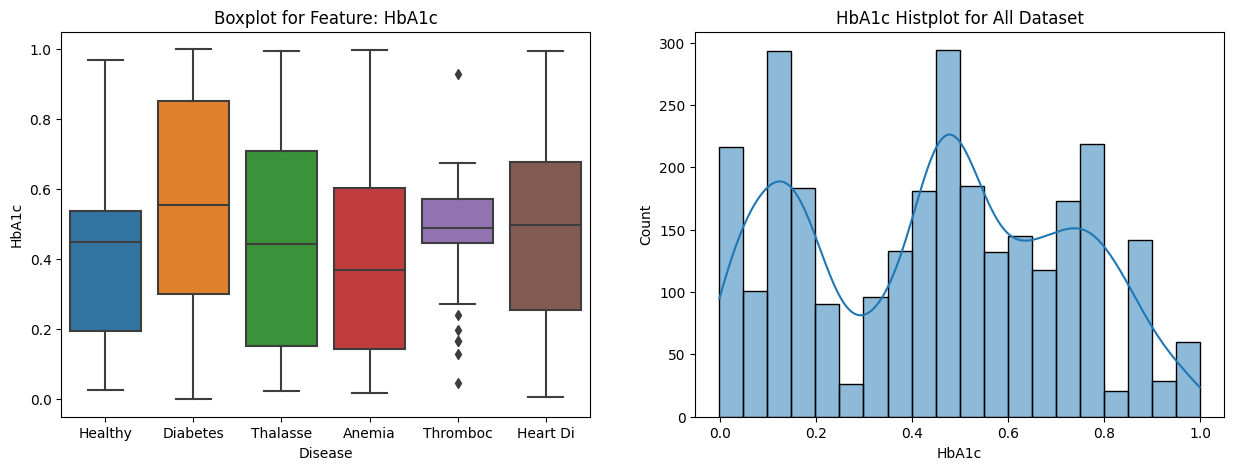

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['HbA1c'], data=df)
plt.title(f'Boxplot for Feature: HbA1c')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['HbA1c'],bins=20,kde=True)
plt.title(f'HbA1c Histplot for All Dataset')
plt.show()

For the HbA1c feature, 'Healthy' instances exhibit HbA1c counts ranging from 0.2 to 0.55, with an average value of 0.45. 'Diabetes' instances range from 0.3 to 0.85, averaging 0.55. 'Thalasse' instances span from 0.15 to 0.7, with an average of 0.45. 'Anemia' instances vary from 0.15 to 0.6, with an average of 0.35. 'Thromboc' instances range from 0.45 to 0.55, with an average of 0.5. 'Heart Di' instances range from 0.21 to 0.79, averaging 0.59. The highest contribution in the HbA1c Histplot for the entire dataset is observed around the range of 0.4 to 0.6. This suggests that HbA1c will have a strong effect on instance distribution of all labels with the least is 'Anemia' while it's average is out of the range.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

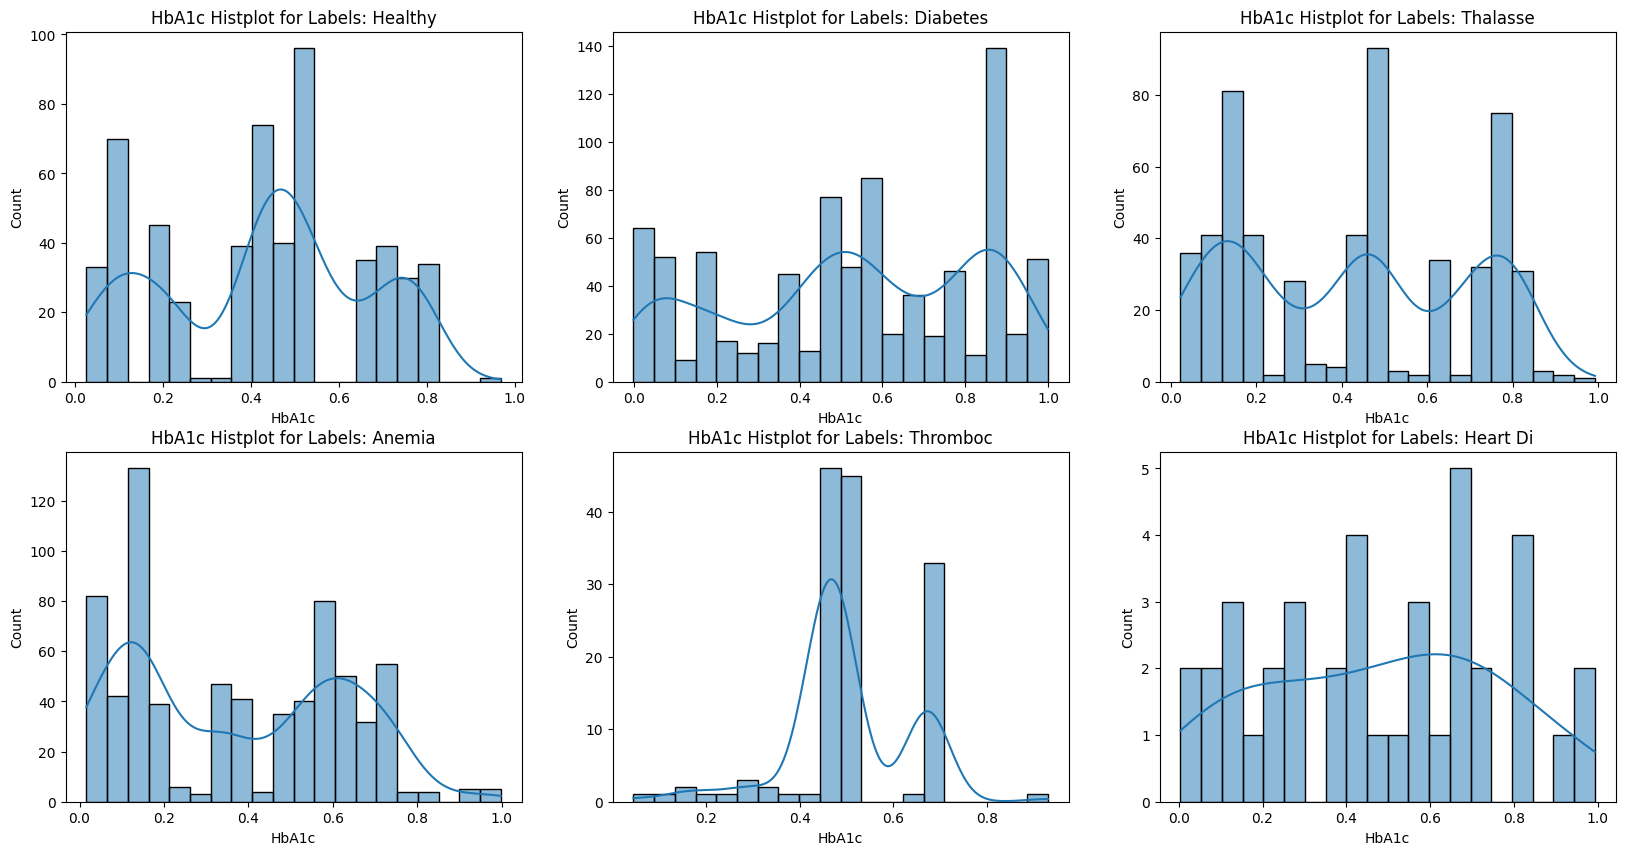

In [46]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='HbA1c', bins=20, kde=True)
    plt.title(f'HbA1c Histplot for Labels: {label_names[i]}')
plt.tight_layout

17. LDL (mg/dL)

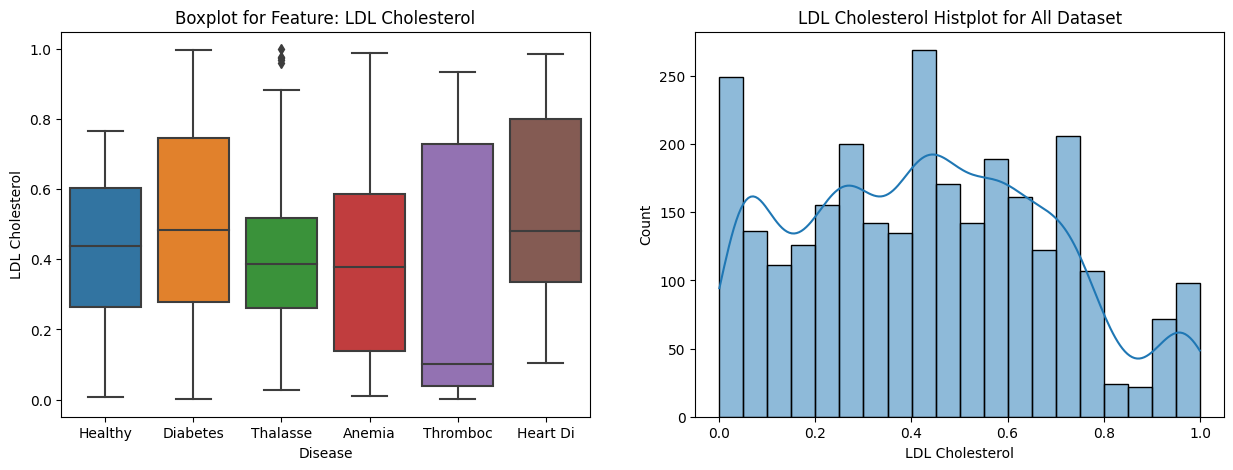

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['LDL Cholesterol'], data=df)
plt.title(f'Boxplot for Feature: LDL Cholesterol')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['LDL Cholesterol'],bins=20,kde=True)
plt.title(f'LDL Cholesterol Histplot for All Dataset')
plt.show()

For the LDL feature, 'Healthy' instances exhibit LDL counts ranging from 0.28 to 0.6, with an average value of 0.45. 'Diabetes' instances range from 0.29 to 0.75, averaging 0.49. 'Thalasse' instances span from 0.28 to 0.5, with an average of 0.39. 'Anemia' instances vary from 0.15 to 0.59, with an average of 0.37. 'Thromboc' instances range from 0.05 to 0.71, with an average of 0.1. 'Heart Di' instances range from 0.35 to 0.8, averaging 0.5. The highest contribution in the LDL Histplot for the entire dataset is observed around the range of 0.4 to 0.6. This suggests that LDL will have a strong effect on instance distribution of all labels especially 'Healthy', 'Diabetes', 'Heart Di'.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

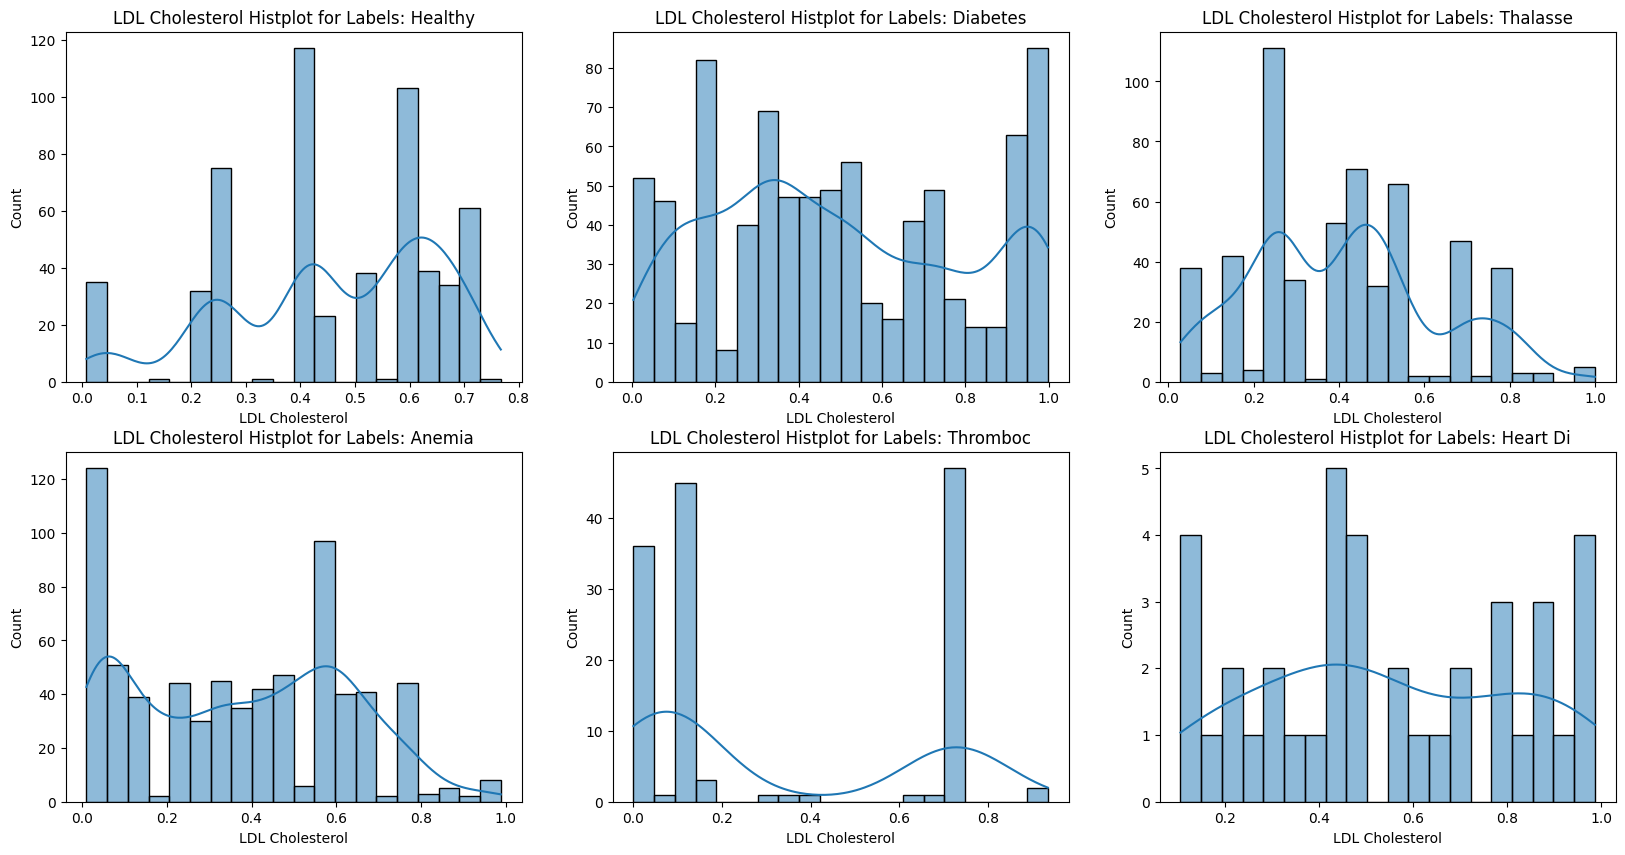

In [48]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='LDL Cholesterol', bins=20, kde=True)
    plt.title(f'LDL Cholesterol Histplot for Labels: {label_names[i]}')
plt.tight_layout

18. HDL (mg/dL)

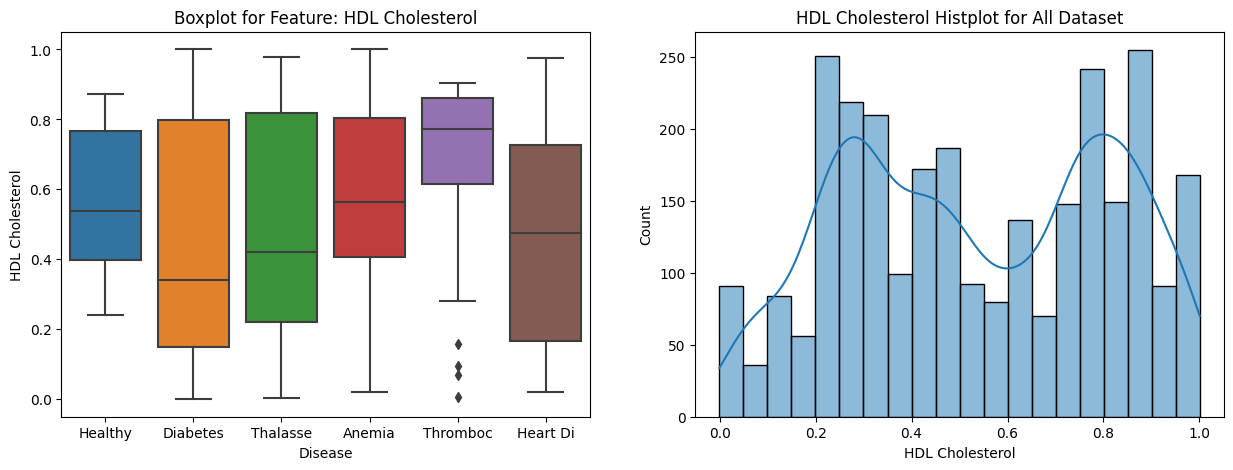

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['HDL Cholesterol'], data=df)
plt.title(f'Boxplot for Feature: HDL Cholesterol')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['HDL Cholesterol'],bins=20,kde=True)
plt.title(f'HDL Cholesterol Histplot for All Dataset')
plt.show()

For the HDL feature, 'Healthy' instances exhibit HDL counts ranging from 0.4 to 0.75, with an average value of 0.55. 'Diabetes' instances range from 0.15 to 0.8, averaging 0.35. 'Thalasse' instances span from 0.21 to 0.81, with an average of 0.41. 'Anemia' instances vary from 0.4 to 0.8, with an average of 0.58. 'Thromboc' instances range from 0.6 to 0.85, with an average of 0.75. 'Heart Di' instances range from 0.15 to 0.71, averaging 0.45. The highest contribution in the HDL Histplot for the entire dataset is observed around the range of 0.2 to 0.35 and 0.75 to 0.9. This suggests that HDL will have a strong effect on instance distribution of all labels especially 'Diabetes', 'Thromboc'.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

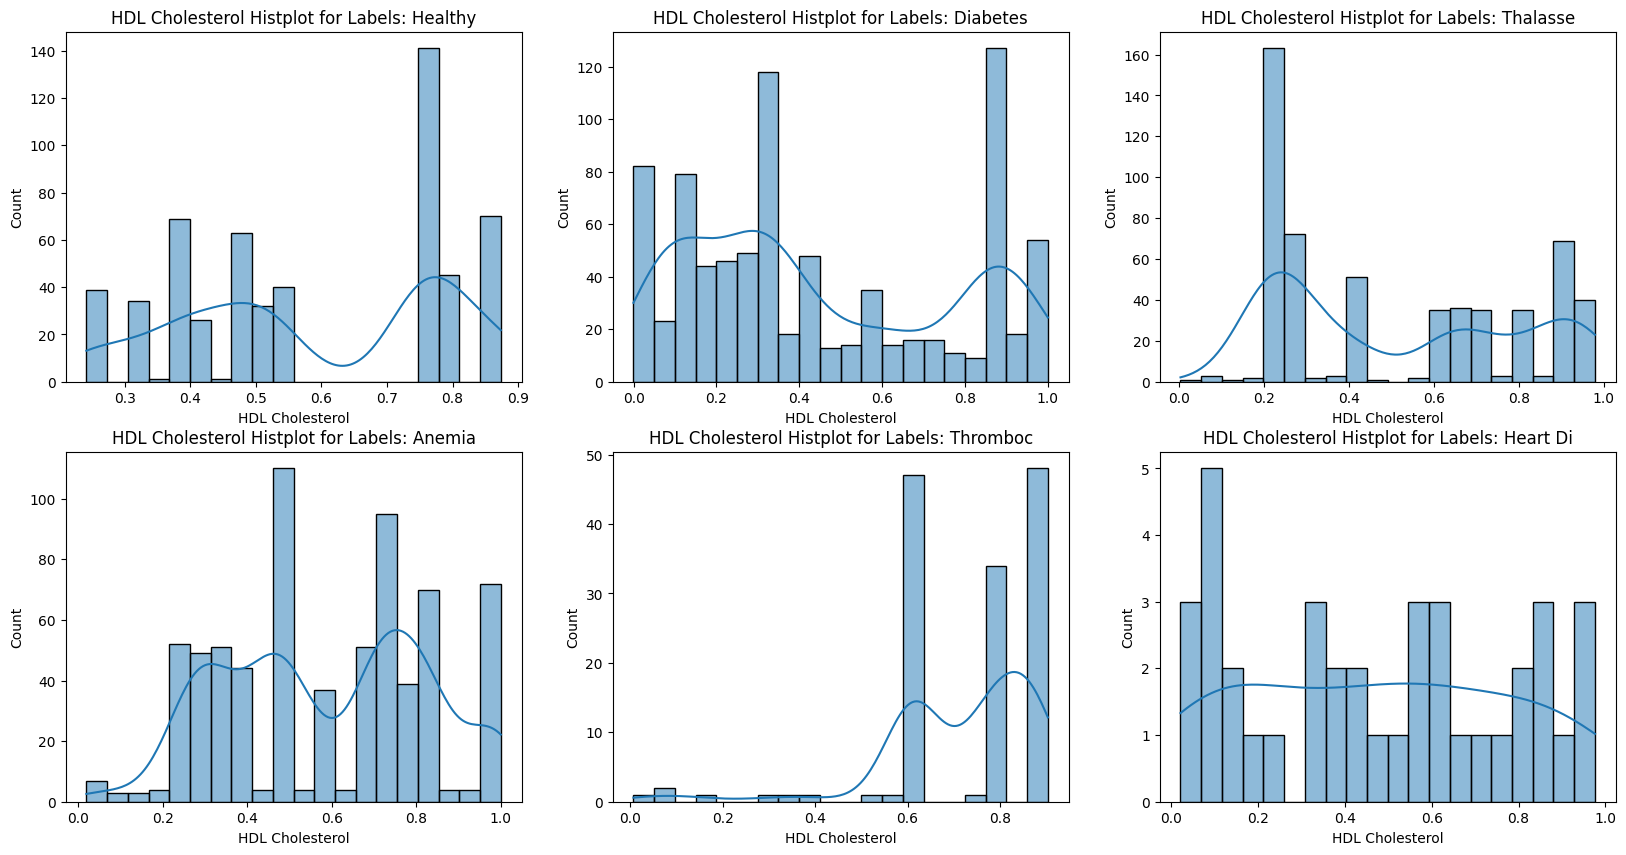

In [50]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='HDL Cholesterol', bins=20, kde=True)
    plt.title(f'HDL Cholesterol Histplot for Labels: {label_names[i]}')
plt.tight_layout

19. ALT (U/L)

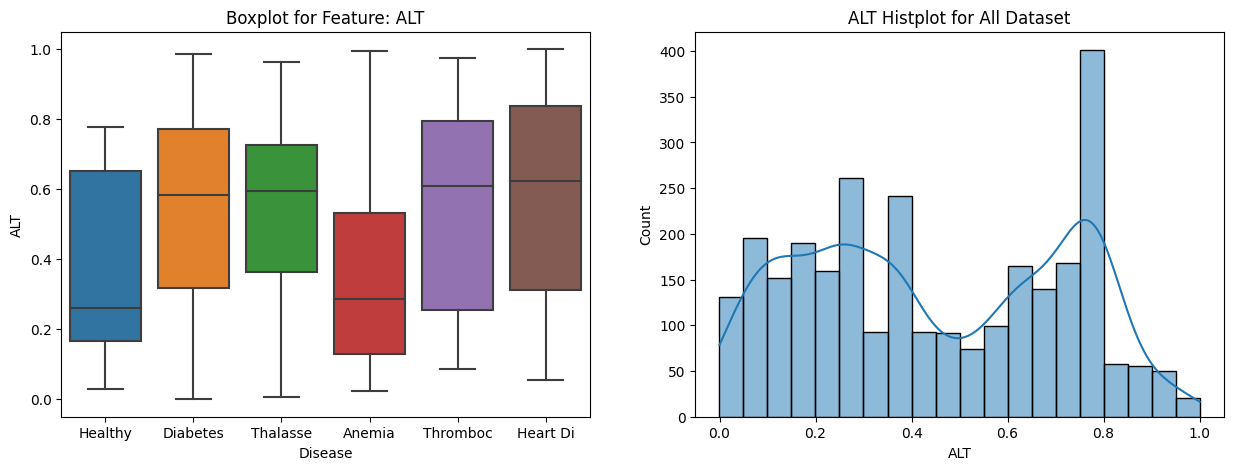

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['ALT'], data=df)
plt.title(f'Boxplot for Feature: ALT')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['ALT'],bins=20,kde=True)
plt.title(f'ALT Histplot for All Dataset')
plt.show()

For the ALT feature, 'Healthy' instances exhibit ALT counts ranging from 0.18 to 0.65, with an average value of 0.29. 'Diabetes' instances range from 0.35 to 0.72, averaging 0.58. 'Thalasse' instances span from 0.35 to 0.7, with an average of 0.59. 'Anemia' instances vary from 0.16 to 0.51, with an average of 0.3. 'Thromboc' instances range from 0.25 to 0.8, with an average of 0.6. 'Heart Di' instances range from 0.3 to 0.85, averaging 0.63. The highest contribution in the ALT Histplot for the entire dataset is observed around the range of 0.0 to 0.4 and 0.7 to 0.8. This suggests that ALT will have a strong effect on instance distribution of all labels.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

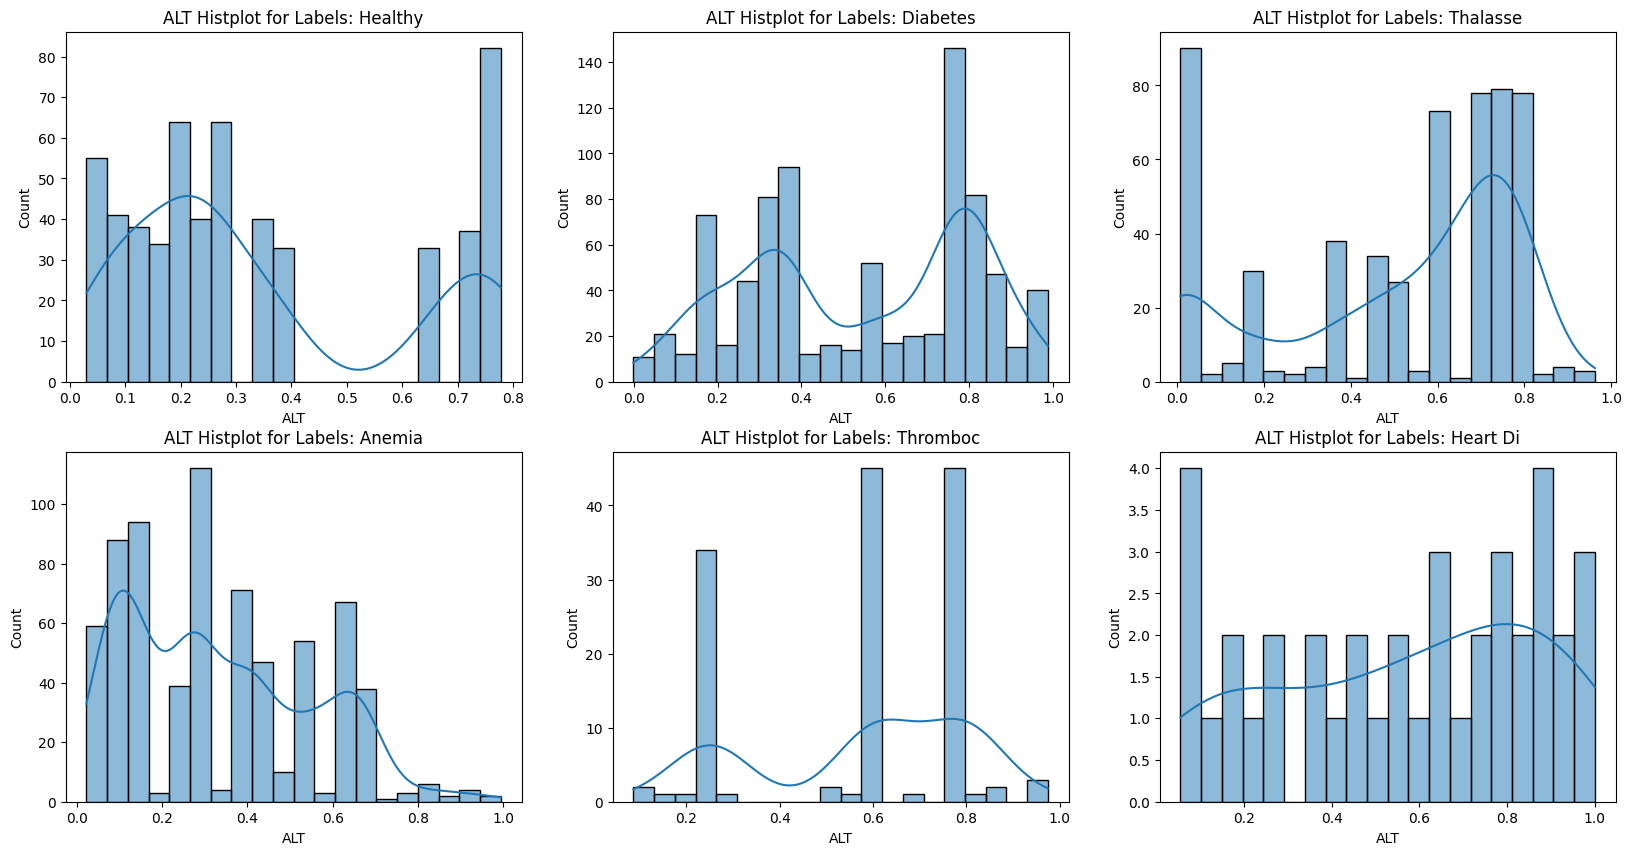

In [52]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='ALT', bins=20, kde=True)
    plt.title(f'ALT Histplot for Labels: {label_names[i]}')
plt.tight_layout

20. AST (U/L)

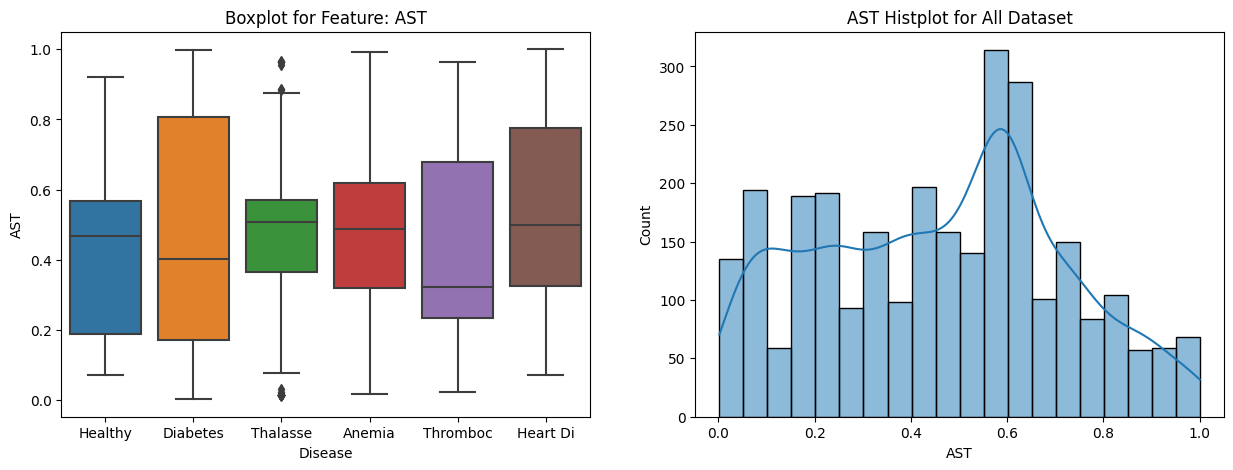

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['AST'], data=df)
plt.title(f'Boxplot for Feature: AST')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['AST'],bins=20,kde=True)
plt.title(f'AST Histplot for All Dataset')
plt.show()

For the AST feature, 'Healthy' instances exhibit AST counts ranging from 0.2 to 0.55, with an average value of 0.49. 'Diabetes' instances range from 0.19 to 0.8, averaging 0.4. 'Thalasse' instances span from 0.35 to 0.55, with an average of 0.56. 'Anemia' instances vary from 0.32 to 0.62, with an average of 0.5. 'Thromboc' instances range from 0.25 to 0.7, with an average of 0.32. 'Heart Di' instances range from 0.32 to 0.78, averaging 0.5. The highest contribution in the AST Histplot for the entire dataset is observed around the range of 0.55 to 0.65. This suggests that AST will have a strong effect on instance distribution of all labels.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

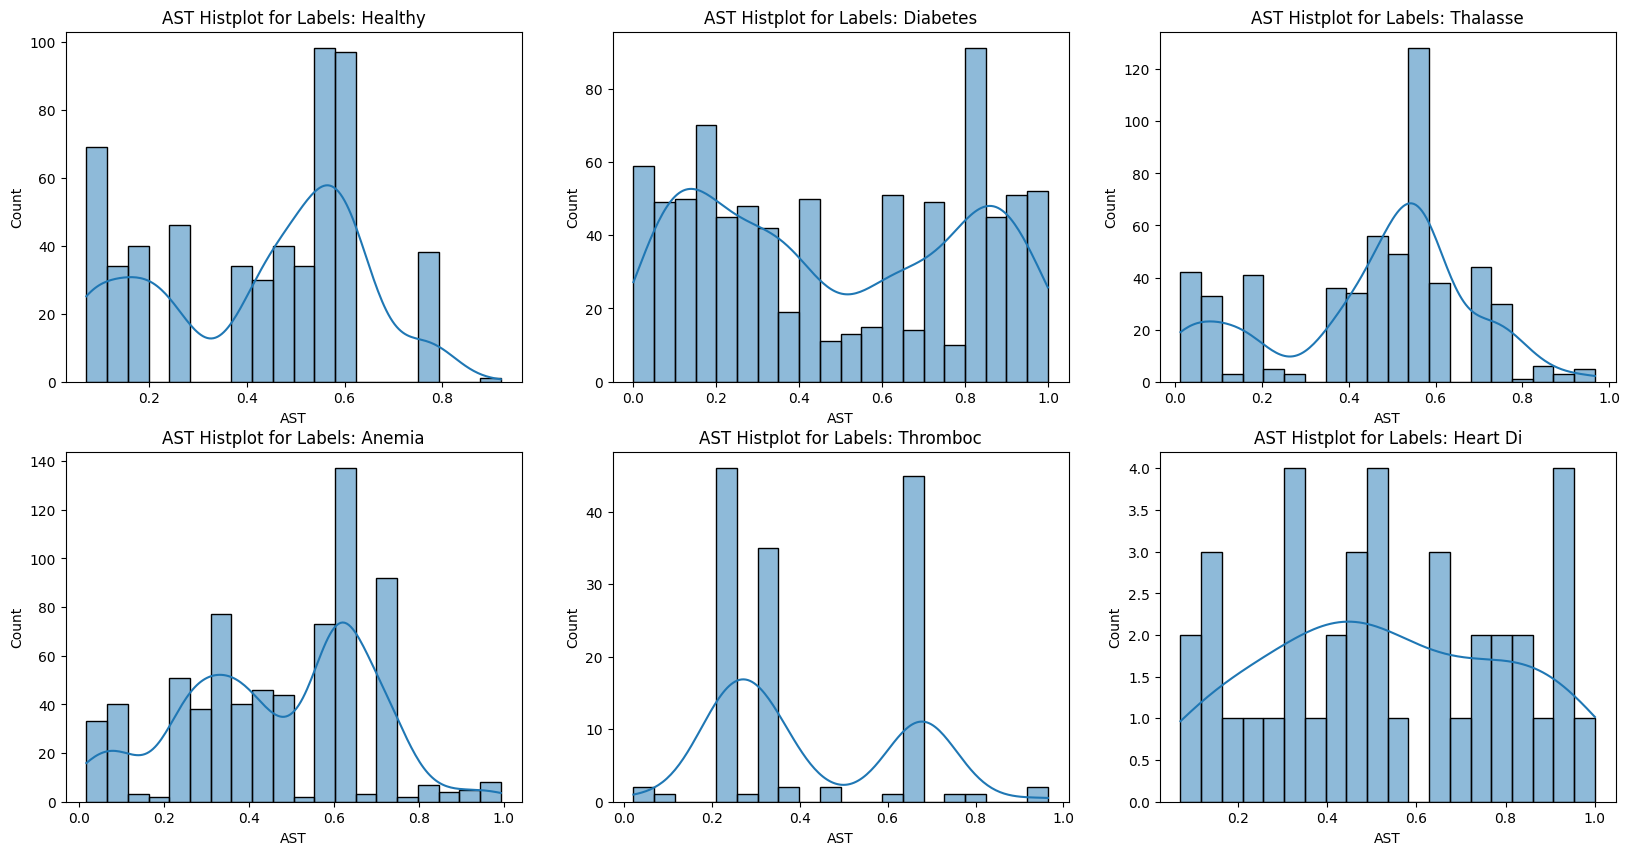

In [54]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='AST', bins=20, kde=True)
    plt.title(f'AST Histplot for Labels: {label_names[i]}')
plt.tight_layout

21. Heart Rate (Beats per minute)

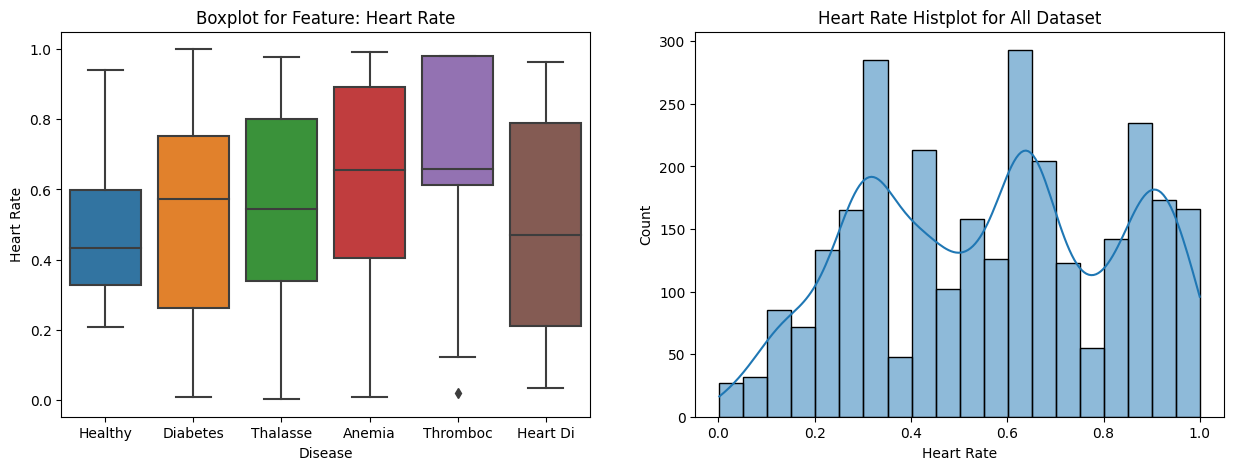

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Heart Rate'], data=df)
plt.title(f'Boxplot for Feature: Heart Rate')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Heart Rate'],bins=20,kde=True)
plt.title(f'Heart Rate Histplot for All Dataset')
plt.show()


For the Heart Rate feature, 'Healthy' instances exhibit Heart Rate counts ranging from 0.32 to 0.6, with an average value of 0.45. 'Diabetes' instances range from 0.25 to 0.75, averaging 0.59. 'Thalasse' instances span from 0.35 to 0.8, with an average of 0.55. 'Anemia' instances vary from 0.4 to 0.9, with an average of 0.65. 'Thromboc' instances range from 0.62 to 0.98, with an average of 0.65. 'Heart Di' instances range from 0.2 to 0.8, averaging 0.5. The highest contribution in the Heart Rate Histplot for the entire dataset is observed around the range of 0.25 to 0.35 and 0.6 to 0.7. This suggests that Heart Rate will have a strong effect on instance distribution of all labels, especially 'Anemia' and 'Thromboc'.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

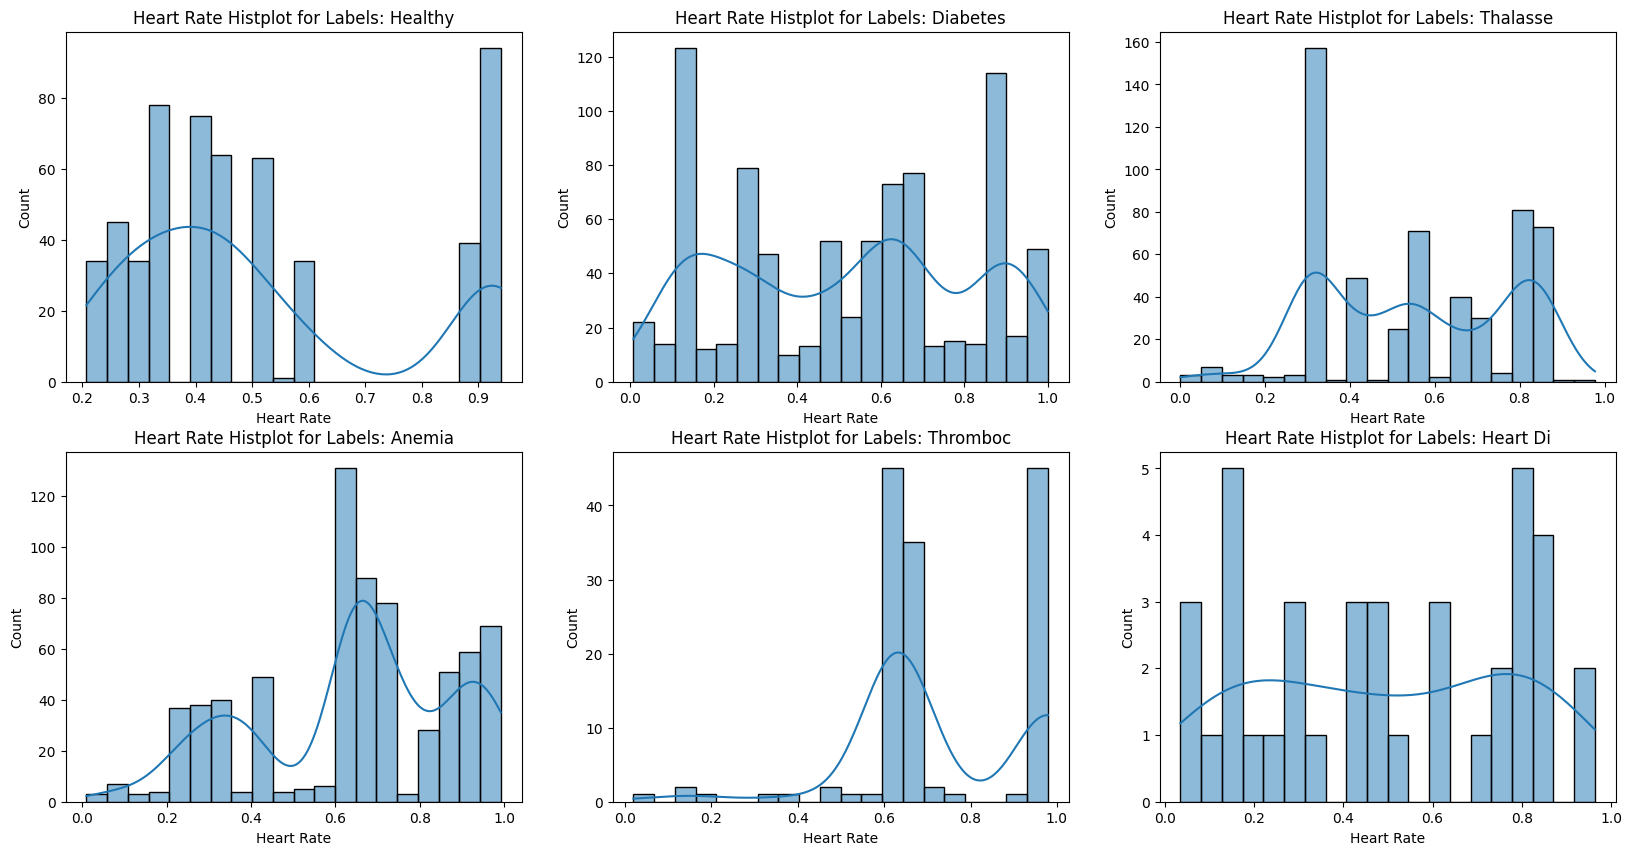

In [56]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Heart Rate', bins=20, kde=True)
    plt.title(f'Heart Rate Histplot for Labels: {label_names[i]}')
plt.tight_layout

22. Creatinine (mg/dL)

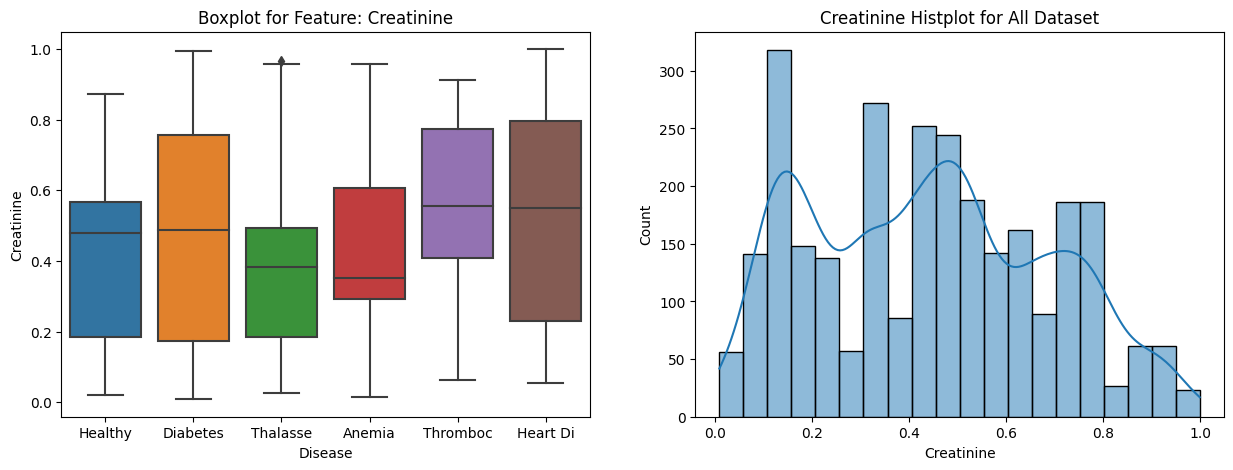

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Creatinine'], data=df)
plt.title(f'Boxplot for Feature: Creatinine')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Creatinine'],bins=20,kde=True)
plt.title(f'Creatinine Histplot for All Dataset')
plt.show()

For the Creatinine feature, 'Healthy' instances exhibit Creatinine counts ranging from 0.19 to 0.58, with an average value of 0.49. 'Diabetes' instances range from 0.18 to 0.75, averaging 0.5. 'Thalasse' instances span from 0.19 to 0.5, with an average of 0.38. 'Anemia' instances vary from 0.3 to 0.6, with an average of 0.35. 'Thromboc' instances range from 0.41 to 0.78, with an average of 0.55. 'Heart Di' instances range from 0.25 to 0.8, averaging 0.55. The highest contribution in the Creatinine Histplot for the entire dataset is observed around the range of 0.1 to 0.2 and 0.3 to 0.55. This suggests that Creatinine will have a strong effect on instance distribution of all labels.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

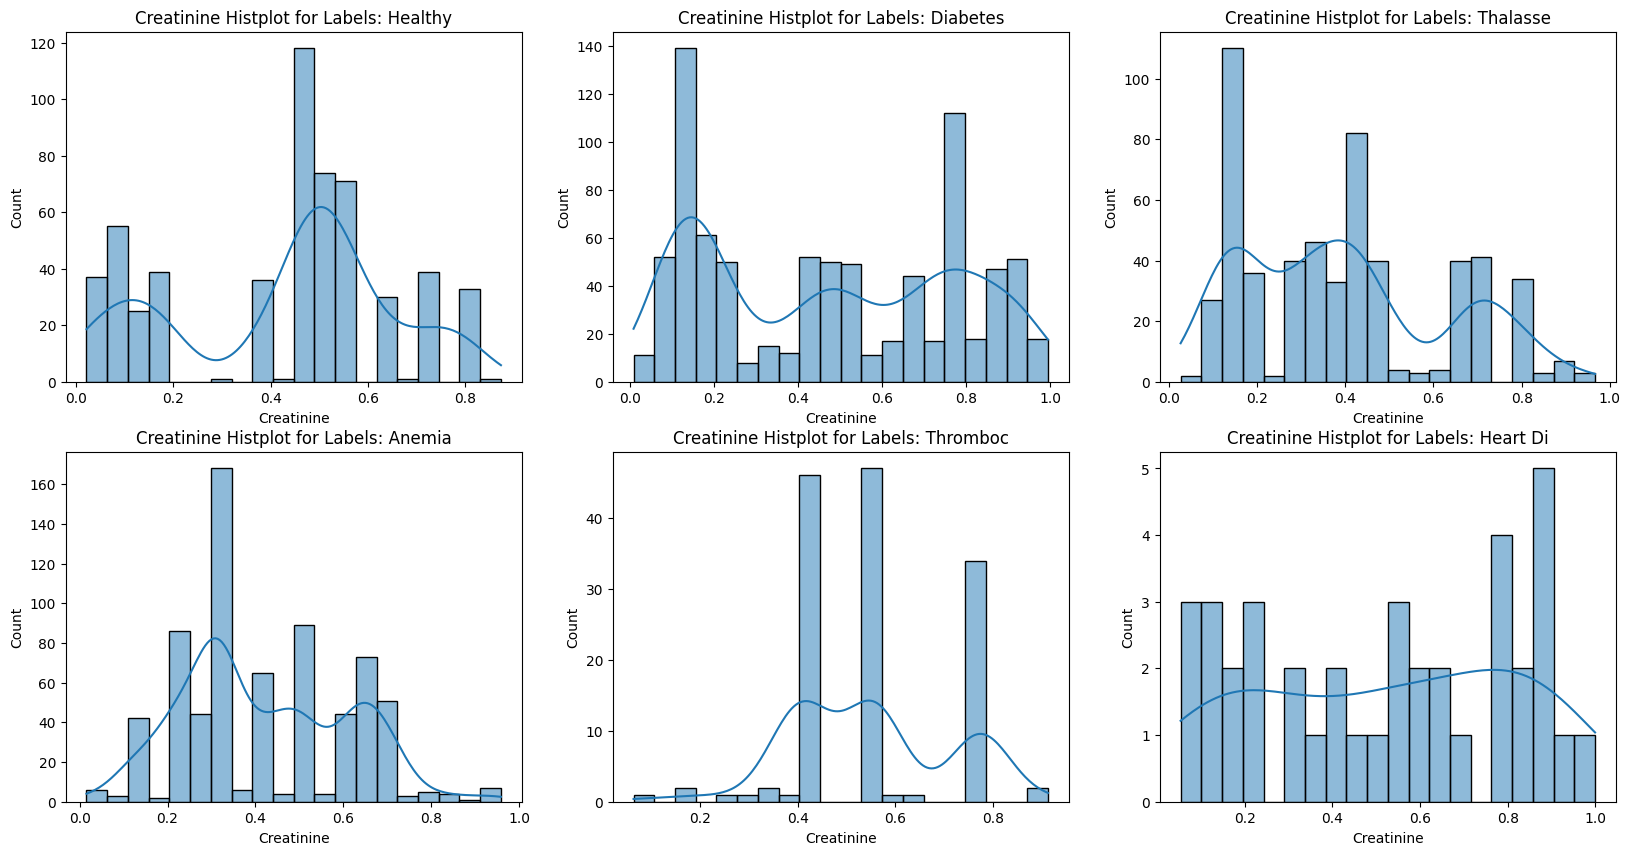

In [58]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Creatinine', bins=20, kde=True)
    plt.title(f'Creatinine Histplot for Labels: {label_names[i]}')
plt.tight_layout

23. Troponin (ng/mL)

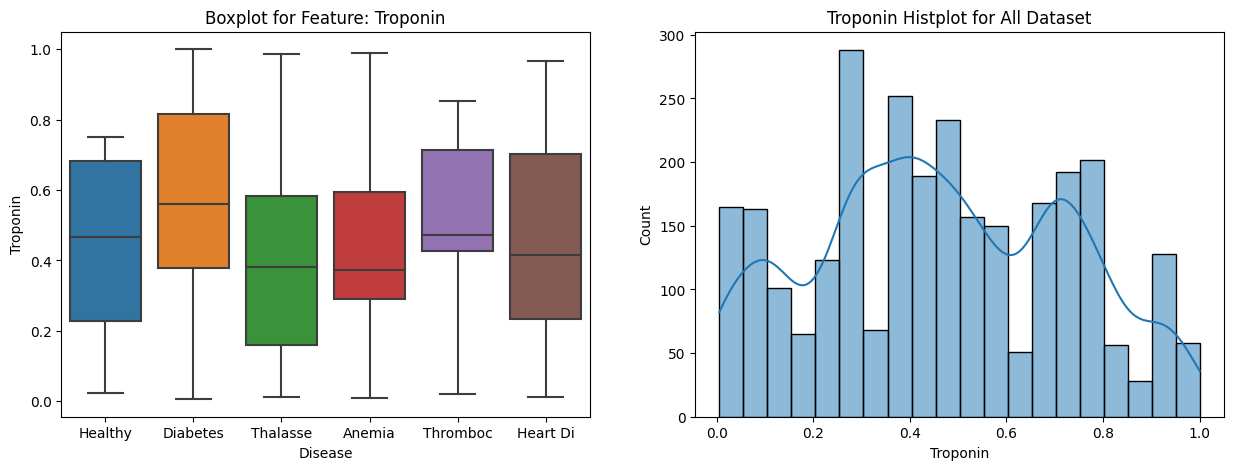

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['Troponin'], data=df)
plt.title(f'Boxplot for Feature: Troponin')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['Troponin'],bins=20,kde=True)
plt.title(f'Troponin Histplot for All Dataset')
plt.show()

For the Troponin feature, 'Healthy' instances exhibit Troponin counts ranging from 0.25 to 0.7, with an average value of 0.49. 'Diabetes' instances range from 0.4 to 0.82, averaging 0.55. 'Thalasse' instances span from 0.15 to 0.58, with an average of 0.38. 'Anemia' instances vary from 0.3 to 0.6, with an average of 0.38. 'Thromboc' instances range from 0.43 to 0.71, with an average of 0.38. 'Heart Di' instances range from 0.25 to 0.7, averaging 0.4. The highest contribution in the Troponin Histplot for the entire dataset is observed around the range of 0.25 to 0.5. This suggests that Troponin will have a strong effect on instance distribution of all labels with the least is 'Diabetes' while it's average is out of the range..

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

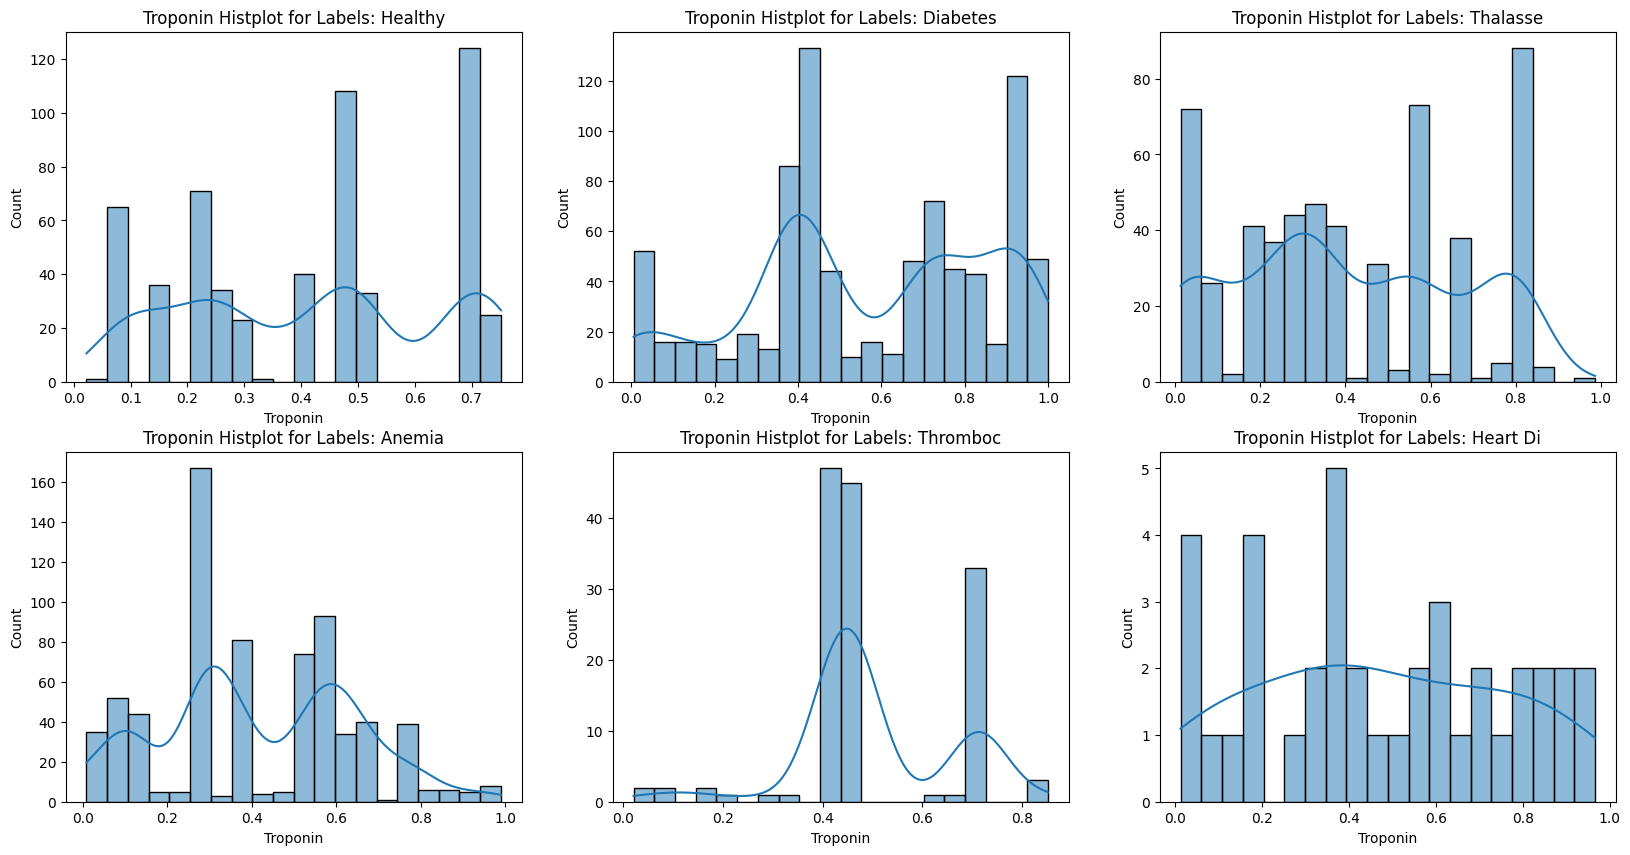

In [60]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='Troponin', bins=20, kde=True)
    plt.title(f'Troponin Histplot for Labels: {label_names[i]}')
plt.tight_layout

24. C-reactive Protein (mg/L)

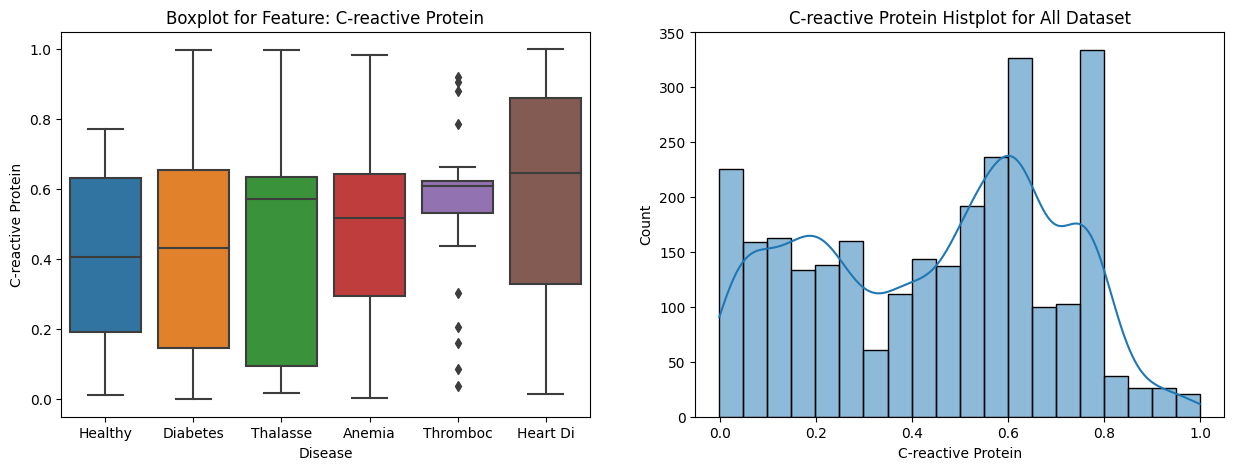

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x=df['Disease'], y=df['C-reactive Protein'], data=df)
plt.title(f'Boxplot for Feature: C-reactive Protein')
plt.subplot(1,2,2)
sb.histplot(data=df,x=df['C-reactive Protein'],bins=20,kde=True)
plt.title(f'C-reactive Protein Histplot for All Dataset')
plt.show()

For the C-reactive Protein feature, 'Healthy' instances exhibit C-reactive Protein counts ranging from 0.2 to 0.63, with an average value of 0.41. 'Diabetes' instances range from 0.15 to 0.65, averaging 0.45. 'Thalasse' instances span from 0.1 to 0.63, with an average of 0.57. 'Anemia' instances vary from 0.3 to 0.62, with an average of 0.52. 'Thromboc' instances range from 0.52 to 0.62, with an average of 0.61. 'Heart Di' instances range from 0.52 to 0.85, averaging 0.63. The highest contribution in the C-reactive Protein Histplot for the entire dataset is observed around the range of 0.5 to 0.65 and 0.75 to 0.8. This suggests that C-reactive Protein will have a strong effect on instance distribution of all labels with the least is 'Healthy' and 'Diabetes' while it's average is out of the range..

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

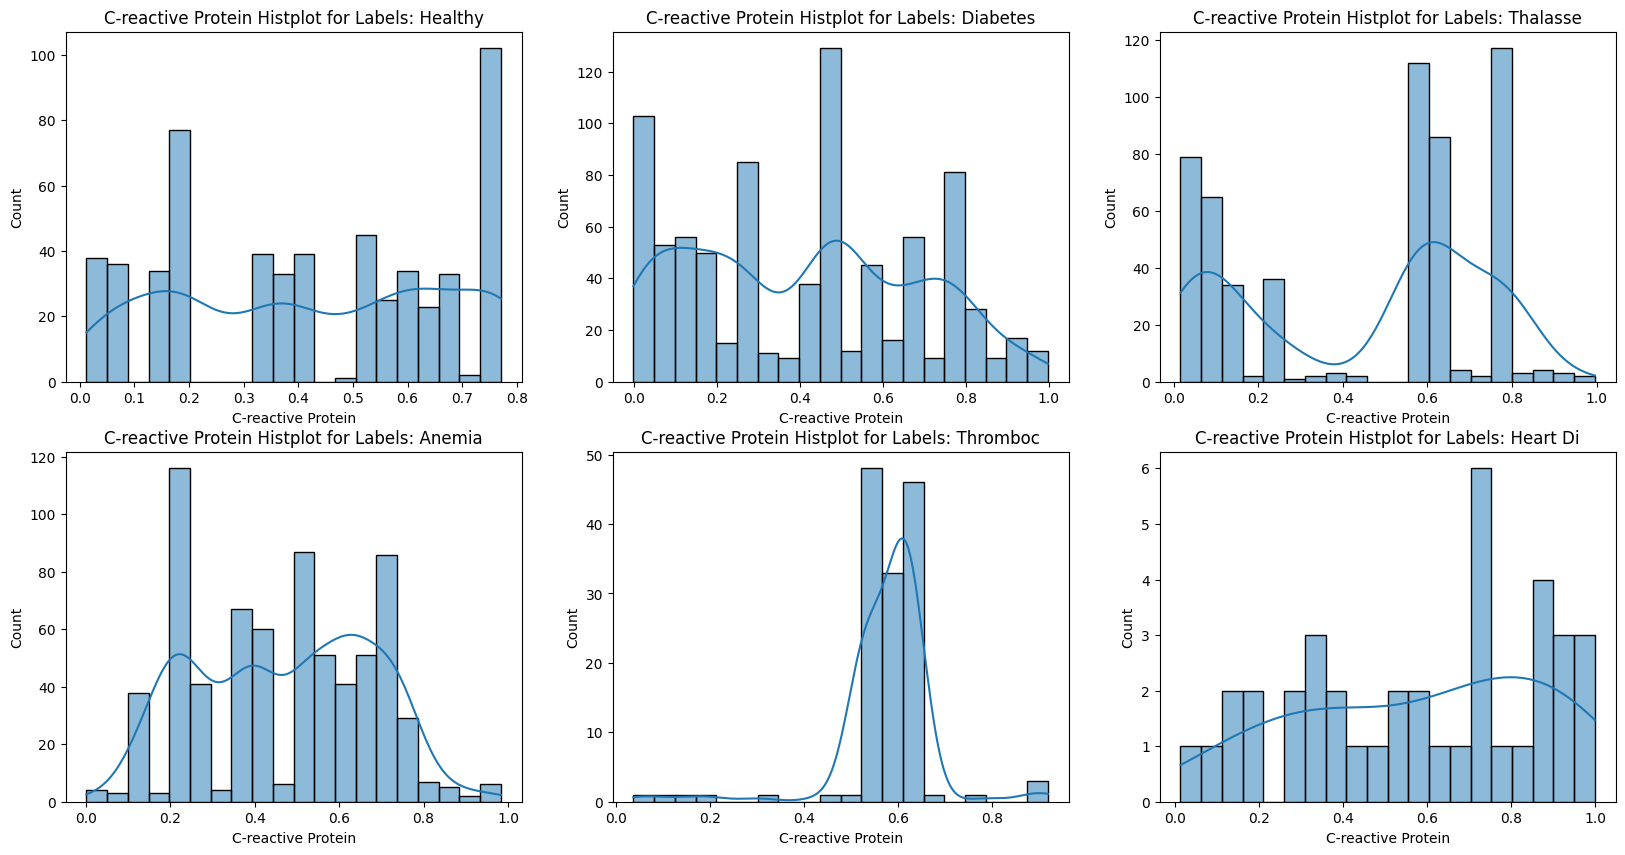

In [62]:
plt.figure(figsize=(20,10))
for i in range(len(label_names)):
    plt.subplot(2,3,i+1)
    sb.histplot(data=df[df['Disease'] == label_names[i]], x='C-reactive Protein', bins=20, kde=True)
    plt.title(f'C-reactive Protein Histplot for Labels: {label_names[i]}')
plt.tight_layout

After visualizing each feature, I generated a correlation heatmap for each label and the features to see which features will affect each label. This will help me evaluate whether my previous assessment is accurate.

Firstly, before generating a correlation heatmap for each label with features, I need to encode the labels so that the seaborn library can understand the dataset. I will use one-hot encoding to generate the heatmap, allowing us to observe not only the correlation between features and each label but also the correlation between the labels themselves

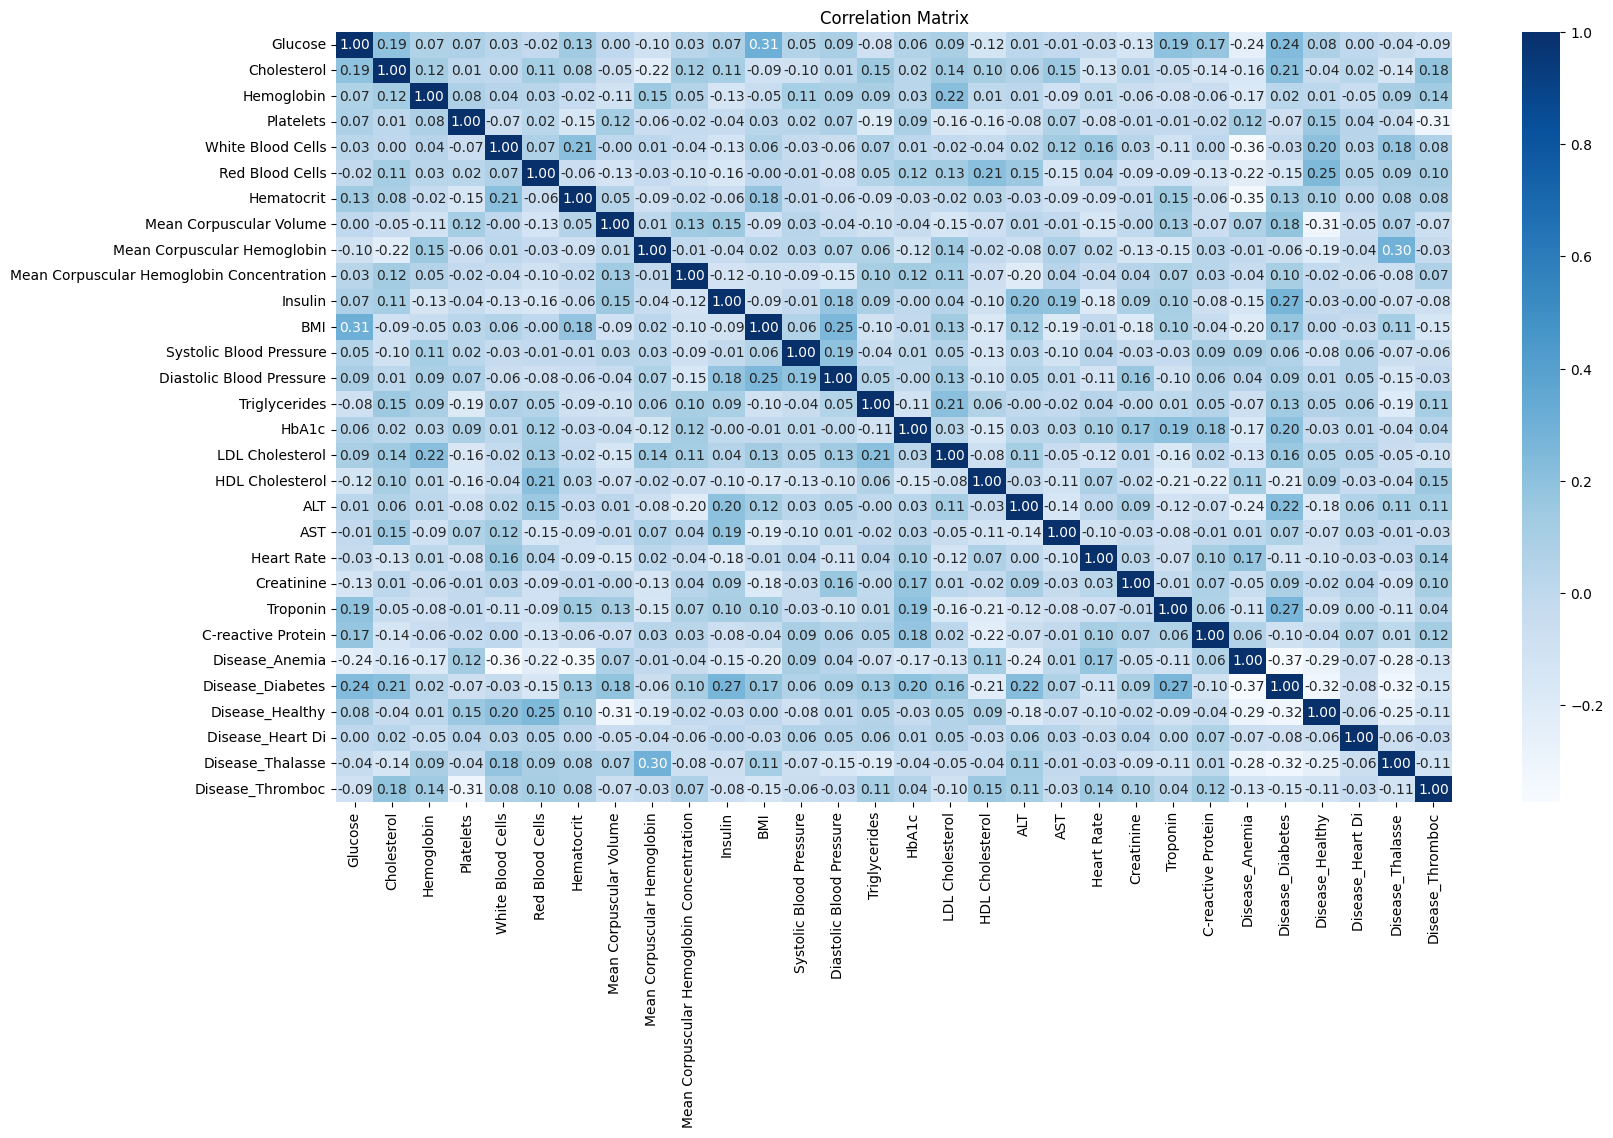

In [63]:
df_encoded = pd.get_dummies(df)
plt.figure(figsize=(18, 10))
sb.heatmap(df_encoded.corr(), annot=True, cbar=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

With the Correlation Heatmap, we can observe that there is a low correlation between the labels themselves, as evidenced by negative correlation scores between each label pair. Additionally, we can discern the impact of features on each disease prediction by examining the correlation scores.

For instance, when considering the 'Thromboc' disease, features such as 'Glucose', 'Platelets', 'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin', and 'Insulin' exhibit very low effects, indicated by scores lower than 0. Conversely, features like 'Cholesterol', 'Hemoglobin', 'White Blood Cells', and 'Red Blood Cells' demonstrate a much higher influence on the prediction of 'Thromboc', as their scores are greater than 0.

The closer the correlation score is to 1, the stronger the effect of that feature on the disease prediction. Conversely, scores closer to -1 indicate a lower impact of the feature on the label under evaluation. Similar observations can be made for other diseases in the dataset.

After completing the analytical phase, I perform preprocessing on the dataset to make it suitable for machine learning algorithms to understand and process.

First, I apply label encoding technique to assign each label an integer value starting from 0 using the replace function.

In [64]:
df.replace({'Disease':{'Healthy':0.0, 'Diabetes':1.0, 'Thalasse':2.0, 'Anemia':3.0, 'Thromboc':4.0, 'Heart Di':5.0}},inplace=True)

In [65]:
X = df[cols]
y = df['Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2206)

In [66]:
X.shape

(2837, 24)

After splitting the dataset into training and test sets using train_test_split, I rescale all the features using StandardScaler() to enhance the model's learning for prediction.

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Finally, I apply models such as Random Forest, k-Nearest Neighbors, Support Vector Machine, and Logistic Regression to train and predict the disease from features in my dataset.

In [68]:
# Define your models
models = {
    'Random Forest': RandomForestClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression()
}

# Dictionary to store results
results = {}

# Loop through models
for name, model in tqdm(models.items()):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy_train = model.score(X_train_scaled, y_train)
    accuracy_test = model.score(X_test_scaled, y_test)
    precision_score_value = precision_score(y_test, predictions, average='macro')
    recall_score_value = recall_score(y_test, predictions, average='macro')
    f1_score_value = f1_score(y_test, predictions, average='macro')

    # Store results
    results[name] = {
        'Accuracy (Train)': accuracy_train,
        'Accuracy (Test)': accuracy_test,
        'Precision': precision_score_value,
        'Recall': recall_score_value,
        'F1-Score': f1_score_value
    }

# Create DataFrame from results
results_df = pd.DataFrame(results).T

# Display the DataFrame
styled_results = results_df.style.highlight_max(color='green').highlight_min(color='red')

styled_results

  0%|          | 0/4 [00:00<?, ?it/s]c:\Users\Windows\miniconda3\envs\k32\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 25%|██▌       | 1/4 [00:00<00:00,  3.20it/s]c:\Users\Windows\miniconda3\envs\k32\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 50%|█████     | 2/4 [00:00<00:00,  3.23it/s]c:\Users\Windows\miniconda3\envs\k32\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

From the results, it is evident that the Random Forest model consistently achieves the highest scores in all evaluation metrics, followed by the SVM model. Conversely, the Logistic Regression model consistently produces the lowest scores across all evaluation metrics.

A Random Forest model with a train accuracy of 1.0 (or 100%) suggests that the model perfectly fits the training data. While this might seem impressive at first glance, it could also indicate potential issues, such as overfitting.

Therefore, even though a train accuracy of 1.0 may initially appear promising, it's crucial to assess the model's performance on unseen data (i.e., the test set or through cross-validation) to ensure that it generalizes well. In this case, the Random Forest model achieves a test accuracy of 0.956, which is quite high and suggests good generalization performance. This indicates that the model likely did not suffer significantly from overfitting.

In disease prediction, prioritizing recall (sensitivity) to maximize the detection of true positive cases is typically crucial, followed by maintaining a balance between precision and recall (as indicated by the F1-score) to ensure accurate and reliable predictions. Given that the Random Forest model demonstrates the highest scores in both metrics, it is the preferred choice for this dataset.

In [70]:
# Define Random Forest model
rf_model = RandomForestClassifier(random_state=2206)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 20, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=20, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Model: ", best_model)

# Evaluate model performance on test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 20 folds for each of 1344 candidates, totalling 26880 fits


c:\Users\Windows\miniconda3\envs\k32\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
13440 fits failed out of a total of 26880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7816 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Windows\miniconda3\envs\k32\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Windows\miniconda3\envs\k32\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Windows\miniconda3\envs\k32\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constrai

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model:  RandomForestClassifier(n_estimators=50, random_state=2206)
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       110
         1.0       0.90      1.00      0.95       166
         2.0       1.00      0.93      0.96       103
         3.0       0.99      0.97      0.98       157
         4.0       1.00      0.95      0.98        22
         5.0       1.00      0.10      0.18        10

    accuracy                           0.96       568
   macro avg       0.98      0.83      0.84       568
weighted avg       0.97      0.96      0.96       568

